In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score, KFold, GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import  make_scorer
from sklearn.metrics import r2_score



# Aperçu des fichiers

In [2]:
df_2015=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/building_energy/2015-building-energy-benchmarking.csv')
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:

df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
df_2016=pd.read_csv('Desktop/OpenClassRoom/Базы_данных/building_energy/2016-building-energy-benchmarking.csv')
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

La structure des données a changé entre 2015 et 2016. Vérifions quelles colonnes sont différentes.

In [6]:
list_1 = list(df_2015.columns) 
list_2 = list(df_2016.columns)

def сomparaison (list_1, list_2):
    dif_2015_2016 = list(set(list_1) - set(list_2))
    dif_2016_2015 = list(set(list_2) - set(list_1))
    return dif_2015_2016 , dif_2016_2015

print("Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :")
сomparaison(list_1, list_2)[0]


Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :


['OtherFuelUse(kBtu)',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'City Council Districts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'SPD Beats',
 'Zip Codes',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas']

In [7]:
print("Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :")
сomparaison(list_1, list_2)[1]

Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :


['Comments',
 'Latitude',
 'TotalGHGEmissions',
 'State',
 'GHGEmissionsIntensity',
 'City',
 'ZipCode',
 'Address',
 'Longitude']

In [8]:
var_15=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
             'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
             'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']

In [9]:
df_2015[var_15].describe()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [10]:
var_16=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
             'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
             'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [11]:
df_2016[var_16].describe()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,119.723971,1.175916
std,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,538.832227,1.821452
min,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,9.495000,0.210000
50%,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,33.920000,0.610000
75%,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,93.940000,1.370000
max,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


Les variables sont les mêmes:
+ GHGEmissionsIntensity(kgCO2e/ft2) (2015) et GHGEmissionsIntensity(2016)
+ GHGEmissions(MetricTonsCO2e)(2015) et TotalGHGEmissions(2016)

In [12]:
# Renaming columns

df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

In [13]:
df_2015.duplicated().value_counts()
df_2016.duplicated().value_counts()

False    3376
dtype: int64

In [14]:
df_2015=df_2015.dropna(axis=0, how='all')
df_2016=df_2016.dropna(axis=0, how='all')

Voici une fonction qui calcule le nombre de valeurs manquantes et le pourcentage des valeurs totales manquantes pour chaque colonne.

In [15]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df_2015)

Your selected dataframe has 47 columns.
There are 32 columns that have missing values.


,Missing Values,% of Total Values
Comment,3327,99.6
Outlier,3256,97.5
YearsENERGYSTARCertified,3230,96.7
City Council Districts,3127,93.6
2010 Census Tracts,3116,93.3
ThirdLargestPropertyUseType,2780,83.2
ThirdLargestPropertyUseTypeGFA,2780,83.2
SecondLargestPropertyUseType,1781,53.3
SecondLargestPropertyUseTypeGFA,1781,53.3
ENERGYSTARScore,780,23.4


In [17]:
df_2015['Comment'].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [18]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_2015);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 47 columns.
There are 32 columns that have missing values.
We will remove 9 columns.


In [19]:
# Drop the columns
df_2015 = df_2015.drop(columns = list(missing_columns))

In [20]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [21]:
missing_values_table(df_2016)

Your selected dataframe has 46 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Comments,3376,100.0
Outlier,3344,99.1
YearsENERGYSTARCertified,3257,96.5
ThirdLargestPropertyUseTypeGFA,2780,82.3
ThirdLargestPropertyUseType,2780,82.3
SecondLargestPropertyUseType,1697,50.3
SecondLargestPropertyUseTypeGFA,1697,50.3
ENERGYSTARScore,843,25.0
LargestPropertyUseType,20,0.6
LargestPropertyUseTypeGFA,20,0.6


In [22]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_2016);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 46 columns.
There are 26 columns that have missing values.
We will remove 7 columns.


In [23]:
# Drop the columns
df_2016 = df_2016.drop(columns = list(missing_columns))

In [24]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3376 non-null   int64  
 1   DataYear                       3376 non-null   int64  
 2   BuildingType                   3376 non-null   object 
 3   PrimaryPropertyType            3376 non-null   object 
 4   PropertyName                   3376 non-null   object 
 5   Address                        3376 non-null   object 
 6   City                           3376 non-null   object 
 7   State                          3376 non-null   object 
 8   ZipCode                        3360 non-null   float64
 9   TaxParcelIdentificationNumber  3376 non-null   object 
 10  CouncilDistrictCode            3376 non-null   int64  
 11  Neighborhood                   3376 non-null   object 
 12  Latitude                       3376 non-null   f

+ Nous laissons les variables qui sont présentes dans les deux bases de données.
+ Nous supprimons les variables qui ne sont pas importantes pour l'apprentissage automatique.


In [25]:
df_15=df_2015

In [26]:
df_15=df_15.drop(['PropertyName', 'TaxParcelIdentificationNumber','Location','ListOfAllPropertyUseTypes',
                    'DefaultData', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Zip Codes',
                  'Seattle Police Department Micro Community Policing Plan Areas'], axis=1)

In [27]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3340 non-null   int64  
 1   DataYear                   3340 non-null   int64  
 2   BuildingType               3340 non-null   object 
 3   PrimaryPropertyType        3340 non-null   object 
 4   CouncilDistrictCode        3340 non-null   int64  
 5   Neighborhood               3340 non-null   object 
 6   YearBuilt                  3340 non-null   int64  
 7   NumberofBuildings          3340 non-null   int64  
 8   NumberofFloors             3332 non-null   float64
 9   PropertyGFATotal           3340 non-null   int64  
 10  PropertyGFAParking         3340 non-null   int64  
 11  PropertyGFABuilding(s)     3340 non-null   int64  
 12  LargestPropertyUseType     3204 non-null   object 
 13  LargestPropertyUseTypeGFA  3204 non-null   float

In [28]:
df_16=df_2016

In [29]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3376 non-null   int64  
 1   DataYear                       3376 non-null   int64  
 2   BuildingType                   3376 non-null   object 
 3   PrimaryPropertyType            3376 non-null   object 
 4   PropertyName                   3376 non-null   object 
 5   Address                        3376 non-null   object 
 6   City                           3376 non-null   object 
 7   State                          3376 non-null   object 
 8   ZipCode                        3360 non-null   float64
 9   TaxParcelIdentificationNumber  3376 non-null   object 
 10  CouncilDistrictCode            3376 non-null   int64  
 11  Neighborhood                   3376 non-null   object 
 12  Latitude                       3376 non-null   f

In [30]:
df_16=df_2016.drop(['PropertyName', 'TaxParcelIdentificationNumber', 'Latitude', 'Longitude' ,'ListOfAllPropertyUseTypes',
                    'DefaultData', 'Address', 'City', 'State', 'ZipCode'], axis=1)

In [31]:

list_1 = list(df_15.columns) 
list_2 = list(df_16.columns)
сomparaison(list_1, list_2)

([], [])

Les deux bases de données ont la même taille.

In [32]:
# Vérifions si les types sont identiques entre 2015 et 2016.

pd.DataFrame([df_15.dtypes, df_16.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus
0,int64,int64,object,object,int64,object,int64,int64,float64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
1,int64,int64,object,object,int64,object,int64,float64,int64,int64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object


Les variables 'NumberofBuildings' et 'NumberofFloors' ont un format différent. Je ne peux pas le changer maintenant depuis que j'ai nan. Je le ferai plus tard

In [33]:
# usionner deux bases de données en une seule

df = pd.concat([df_15[df_16.columns],df_16], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,Compliant,249.43,2.64
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,Compliant,263.51,2.38
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Compliant,2061.48,1.92
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,...,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,Compliant,1936.34,31.38
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,...,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,Compliant,507.70,4.02


In [34]:
df.shape

(6716, 29)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              6716 non-null   int64  
 1   DataYear                   6716 non-null   int64  
 2   BuildingType               6716 non-null   object 
 3   PrimaryPropertyType        6716 non-null   object 
 4   CouncilDistrictCode        6716 non-null   int64  
 5   Neighborhood               6716 non-null   object 
 6   YearBuilt                  6716 non-null   int64  
 7   NumberofBuildings          6708 non-null   float64
 8   NumberofFloors             6708 non-null   float64
 9   PropertyGFATotal           6716 non-null   int64  
 10  PropertyGFAParking         6716 non-null   int64  
 11  PropertyGFABuilding(s)     6716 non-null   int64  
 12  LargestPropertyUseType     6560 non-null   object 
 13  LargestPropertyUseTypeGFA  6560 non-null   float

# Description et nettoyage des données

In [36]:
df.duplicated().value_counts()

False    6716
dtype: int64

Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType.


In [37]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [38]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

Comments les variables qui se terminent par WN (Weather Normalized) qui sont des corrections des conditions climatiques.
Discribe montre presque la même distribution. Par conséquent, je supprime les variables se terminant par WN.

In [39]:
df=df.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'], axis=1)

+ Electricity(kWh)/Electricity(kBtu)
+ NaturalGas(therms)/NaturalGas(kBtu)

La consommation d'énergie et de gaz est exprimée en différentes unités. Par conséquent, je supprime certaines des variables.

In [40]:
df=df.drop(['NaturalGas(therms)','Electricity(kWh)'], axis=1)

In [41]:
# Idem pour la variable GHGEmissionsIntensity
df=df.drop('GHGEmissionsIntensity', axis=1)

In [42]:
# En ce qui concerne l'énergie, nous pouvons éliminer également les données surfaciques

df=df.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)'], axis=1)

In [43]:
df=df.drop('ComplianceStatus', axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3318 non-null   int64  
 1   DataYear                   3318 non-null   int64  
 2   BuildingType               3318 non-null   object 
 3   PrimaryPropertyType        3318 non-null   object 
 4   CouncilDistrictCode        3318 non-null   int64  
 5   Neighborhood               3318 non-null   object 
 6   YearBuilt                  3318 non-null   int64  
 7   NumberofBuildings          3316 non-null   float64
 8   NumberofFloors             3310 non-null   float64
 9   PropertyGFATotal           3318 non-null   int64  
 10  PropertyGFAParking         3318 non-null   int64  
 11  PropertyGFABuilding(s)     3318 non-null   int64  
 12  LargestPropertyUseType     3247 non-null   object 
 13  LargestPropertyUseTypeGFA  3247 non-null   float

In [45]:
# Regardons les valeurs des variables

for column in df.columns:
    if df[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n{}\n'.format(column, df[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(column, df[column].nunique()))

Colonne OSEBuildingID, 1698 valeurs uniques
Colonne DataYear, valeurs uniques :
[2015 2016]

Colonne BuildingType, valeurs uniques :
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

Colonne PrimaryPropertyType, 30 valeurs uniques
Colonne CouncilDistrictCode, valeurs uniques :
[7 3 2 4 5 6 1]

Colonne Neighborhood, valeurs uniques :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']

Colonne YearBuilt, 113 valeurs uniques
Colonne NumberofBuildings, valeurs uniques :
[  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]

Colonne NumberofFloors, 45 valeurs uniques
Colonne PropertyGFATotal, 1667 valeurs uniques
Colonne PropertyGFAParking, 366 valeurs uniques
Colonne PropertyGFABuilding(s), 1694 valeurs uniques
Colonne

In [46]:
df=df.replace(to_replace=['DELRIDGE NEIGHBORHOODS', 'Central', 'Ballard', 'North', 'Delridge', 'Northwest'], 
              value=['DELRIDGE', 'CENTRAL', 'BALLARD', 'NORTH', 'DELRIDGE', 'NORTHWEST'])

In [47]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [48]:
df=df.drop('CouncilDistrictCode', axis=1)

Сertains indicateurs numériques devraient être positifs.

In [49]:
df.min()

OSEBuildingID                                 1
DataYear                                   2015
BuildingType                             Campus
PrimaryPropertyType          College/University
Neighborhood                            BALLARD
YearBuilt                                  1900
NumberofBuildings                             0
NumberofFloors                                0
PropertyGFATotal                          11285
PropertyGFAParking                           -2
PropertyGFABuilding(s)                   -50550
LargestPropertyUseTypeGFA                  5656
ENERGYSTARScore                               1
SiteEnergyUse(kBtu)                           0
SteamUse(kBtu)                                0
Electricity(kBtu)                       -115417
NaturalGas(kBtu)                              0
TotalGHGEmissions                          -0.8
dtype: object

In [50]:
df[(df.PropertyGFAParking) <0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3136,29551,2015,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,2000,1.0,11.0,68452,-2,68454,Office,61665.0,81.0,3670298.0,0.0,3670451.0,0.0,25.59


In [51]:
index_to_drop=df[df['PropertyGFAParking']<0].index
df.drop(index_to_drop, inplace=True)

In [52]:
df[(df['PropertyGFABuilding(s)']) <=0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3139,29788,2015,NonResidential,Small- and Mid-Sized Office,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,97325,-43310,Office,54015.0,65.0,3455247.0,0.0,3455391.0,0.0,24.09
3322,50002,2015,NonResidential,Other,NORTHEAST,2014,1.0,3.0,33648,84198,-50550,Parking,83600.0,NaN,1389553.0,0.0,1389610.0,0.0,9.69


In [53]:

index_to_drop=df[df['PropertyGFABuilding(s)']<=0].index
df.drop(index_to_drop, inplace=True)

In [54]:
# contrôle des valeurs negatives
quantitative_columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
for column in quantitative_columns:
    incoherent_values = df[df[column] <=0]
    if(incoherent_values.shape[0]>0):
        print(column)
        display(incoherent_values)
        df=df.drop(incoherent_values.index)

SiteEnergyUse(kBtu)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
44,58,2015,NonResidential,Retail Store,DOWNTOWN,1920,1.0,2.0,57428,0,57428,Retail Store,34617.0,NaN,0.0,0.0,0.0,0.0,0.00
572,765,2015,NonResidential,Large Office,DOWNTOWN,1929,1.0,27.0,216571,13320,203251,Office,182604.0,NaN,0.0,0.0,0.0,0.0,0.00
28,34,2016,SPS-District K-12,K-12 School,CENTRAL,1955,1.0,1.0,126351,0,126351,K-12 School,126351.0,NaN,0.0,0.0,0.0,0.0,0.00
31,37,2016,SPS-District K-12,K-12 School,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,0,51582,K-12 School,55166.0,NaN,0.0,0.0,1496816.0,0.0,10.43
62,87,2016,SPS-District K-12,K-12 School,SOUTHWEST,1948,1.0,2.0,53352,0,53352,K-12 School,65568.0,NaN,0.0,0.0,600813.0,0.0,4.19
81,118,2016,SPS-District K-12,K-12 School,DELRIDGE,1999,1.0,3.0,74468,0,74468,K-12 School,75364.0,NaN,0.0,0.0,1698176.0,0.0,11.84
85,122,2016,SPS-District K-12,K-12 School,SOUTHEAST,1991,1.0,2.0,58933,0,58933,K-12 School,60725.0,NaN,0.0,0.0,2347138.0,0.0,16.36
95,140,2016,SPS-District K-12,K-12 School,LAKE UNION,1991,1.0,3.0,66588,0,66588,K-12 School,66588.0,NaN,0.0,0.0,2104286.0,0.0,14.67
133,217,2016,SPS-District K-12,K-12 School,BALLARD,1959,1.0,1.0,160270,0,160270,K-12 School,160270.0,NaN,0.0,0.0,0.0,4318917.0,229.38
139,227,2016,SPS-District K-12,K-12 School,CENTRAL,1963,1.0,3.0,136188,0,136188,K-12 School,136188.0,NaN,0.0,0.0,0.0,3217877.0,170.90


TotalGHGEmissions


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
513,700,2016,NonResidential,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0,57176,Supermarket/Grocery Store,39500.0,31.0,1.252517e+07,0.0,0.0,0.0,0.0
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,48159.0,100.0,3.427261e+05,0.0,-115417.0,0.0,-0.8


In [55]:
# Correction du nombre de bâtiments et d'étages (ne peut être nul ou NaN)

df['NumberofBuildings'].fillna(0, inplace=True)
df['NumberofBuildings'].replace(0, 1, inplace=True)
df['NumberofFloors'].fillna(0, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [56]:
df['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,  27.,
        14.,   9.,   5.,   8.,  23., 111.])

In [57]:
df['NumberofFloors'].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  3.,  4., 24., 20., 34.,  1., 16., 23., 17., 36.,
       22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46., 30.,
       56., 76., 99., 39., 27.])

In [58]:
df.min()

OSEBuildingID                                 1
DataYear                                   2015
BuildingType                             Campus
PrimaryPropertyType          College/University
Neighborhood                            BALLARD
YearBuilt                                  1900
NumberofBuildings                             1
NumberofFloors                                1
PropertyGFATotal                          11285
PropertyGFAParking                            0
PropertyGFABuilding(s)                     3636
LargestPropertyUseTypeGFA                  5656
ENERGYSTARScore                               1
SiteEnergyUse(kBtu)                       11441
SteamUse(kBtu)                                0
Electricity(kBtu)                             0
NaturalGas(kBtu)                              0
TotalGHGEmissions                          0.08
dtype: object

In [59]:
# Création d'une nouvelle variable 'BuildingAge'

df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df=df.drop(['DataYear', 'YearBuilt'], axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3274 non-null   int64  
 1   BuildingType               3274 non-null   object 
 2   PrimaryPropertyType        3274 non-null   object 
 3   Neighborhood               3274 non-null   object 
 4   NumberofBuildings          3274 non-null   float64
 5   NumberofFloors             3274 non-null   float64
 6   PropertyGFATotal           3274 non-null   int64  
 7   PropertyGFAParking         3274 non-null   int64  
 8   PropertyGFABuilding(s)     3274 non-null   int64  
 9   LargestPropertyUseType     3203 non-null   object 
 10  LargestPropertyUseTypeGFA  3203 non-null   float64
 11  ENERGYSTARScore            2190 non-null   float64
 12  SiteEnergyUse(kBtu)        3266 non-null   float64
 13  SteamUse(kBtu)             3266 non-null   float

Nous considérons des variables qualitatives.

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

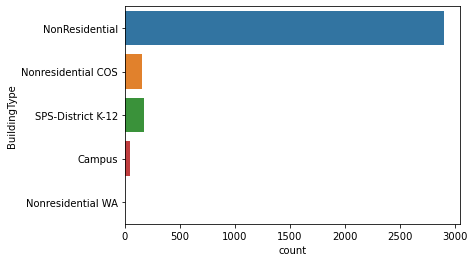

In [61]:
sns.countplot(y=df.BuildingType)

In [62]:
df['BuildingType'].value_counts()

NonResidential        2899
SPS-District K-12      176
Nonresidential COS     152
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

il n'y a qu'une seule valeur pour 'Nonresidential WA', ce qui risque de poser des problèmes lors de la séparation du jeu de données; nous allons éliminer cette ligne :

In [63]:
index_to_drop=df[df['BuildingType']=="Nonresidential WA"].index
df.drop(index_to_drop, inplace=True)

In [64]:
# Quels sont ces bâtiments référencés 'NonResidential' et qui représentent la majeure partie des bâtiments.

df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()


Small- and Mid-Sized Office    574
Other                          374
Large Office                   331
Mixed Use Property             201
Retail Store                   190
Warehouse                      180
Non-Refrigerated Warehouse     178
Hotel                          148
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     39
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert


Les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non résidentiels.

In [65]:
df.loc[(df['PrimaryPropertyType']=="University")|
       (df['PrimaryPropertyType']=="College/University")]

# 24 104

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
24,30,NonResidential,College/University,DOWNTOWN,1.0,7.0,126593,0,126593,College/University,125000.0,NaN,9.791557e+06,0.0,4582663.0,5209084.0,308.60,87
104,170,NonResidential,College/University,EAST,1.0,3.0,63330,0,63330,College/University,64820.0,NaN,2.755578e+06,0.0,1863973.0,891682.0,60.35,100
105,172,Campus,College/University,DELRIDGE,1.0,2.0,441071,0,441071,College/University,483000.0,NaN,3.743078e+07,0.0,24886028.0,12545788.0,839.79,45
114,182,NonResidential,College/University,MAGNOLIA / QUEEN ANNE,1.0,2.0,52611,0,52611,College/University,52611.0,NaN,4.399828e+06,0.0,2782111.0,1617832.0,105.32,35
127,211,Campus,College/University,NORTHWEST,11.0,2.0,694072,111625,582447,College/University,667265.0,NaN,3.711721e+07,0.0,33183593.0,3934997.0,440.31,45
583,777,NonResidential,College/University,CENTRAL,1.0,2.0,60122,0,60122,College/University,60122.0,NaN,5.527290e+05,0.0,552752.0,0.0,3.85,99
635,851,NonResidential,College/University,CENTRAL,1.0,4.0,76700,0,76700,College/University,114000.0,NaN,7.011508e+06,0.0,6605603.0,406180.0,67.62,41
777,19833,NonResidential,College/University,DOWNTOWN,1.0,2.0,28923,0,28923,College/University,28800.0,NaN,4.563970e+05,0.0,190991.0,265414.0,15.43,23
779,19836,NonResidential,College/University,DOWNTOWN,1.0,3.0,21600,0,21600,College/University,21600.0,NaN,3.154680e+05,0.0,228983.0,86495.0,6.19,87
907,20166,NonResidential,College/University,DOWNTOWN,1.0,3.0,28800,0,28800,College/University,28800.0,NaN,7.313150e+05,0.0,652653.0,78689.0,8.73,105


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3273 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3273 non-null   int64  
 1   BuildingType               3273 non-null   object 
 2   PrimaryPropertyType        3273 non-null   object 
 3   Neighborhood               3273 non-null   object 
 4   NumberofBuildings          3273 non-null   float64
 5   NumberofFloors             3273 non-null   float64
 6   PropertyGFATotal           3273 non-null   int64  
 7   PropertyGFAParking         3273 non-null   int64  
 8   PropertyGFABuilding(s)     3273 non-null   int64  
 9   LargestPropertyUseType     3202 non-null   object 
 10  LargestPropertyUseTypeGFA  3202 non-null   float64
 11  ENERGYSTARScore            2190 non-null   float64
 12  SiteEnergyUse(kBtu)        3265 non-null   float64
 13  SteamUse(kBtu)             3265 non-null   float

In [67]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    574
Other                          374
Large Office                   331
Mixed Use Property             201
Retail Store                   190
Warehouse                      180
Non-Refrigerated Warehouse     178
Hotel                          148
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     39
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert

In [68]:
df=df.replace(to_replace=[ 'Restaurant\n'], 
              value=['Restaurant'])

In [69]:
df.loc[(df['BuildingType']=="Nonresidential COS"),'PrimaryPropertyType'].value_counts()

Other                          104
Mixed Use Property              11
Small- and Mid-Sized Office      8
Warehouse                        7
Large Office                     7
Non-Refrigerated Warehouse       6
Office                           3
Distribution Center              2
Medical Office                   2
Distribution Center\n            2
Name: PrimaryPropertyType, dtype: int64

In [70]:
df.loc[(df['BuildingType']=="Campus"),'PrimaryPropertyType'].value_counts()

Other                   14
K-12 School              8
Mixed Use Property       7
University               6
College/University       5
Restaurant               2
Large Office             2
Low-Rise Multifamily     2
Name: PrimaryPropertyType, dtype: int64

"Low-Rise Multifamily" dans "Campus" et "NonResidential" est une erreur. Nous supprimons ces lignes.

In [71]:
data_anomalies = df[~df['BuildingType'].str.contains("Multifamily") & df['PrimaryPropertyType'].str.contains("Multifamily")]
display(data_anomalies)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
1311,21481,Campus,Low-Rise Multifamily,DOWNTOWN,1.0,4.0,45500,0,45500,Multifamily Housing,22669.0,NaN,3.863772e+06,0.0,3863933.0,0.0,26.94,73
2481,25674,NonResidential,Low-Rise Multifamily,EAST,1.0,3.0,32100,0,32100,Multifamily Housing,21400.0,NaN,9.385100e+04,0.0,6581.0,87270.0,4.68,105
644,19445,NonResidential,Low-Rise Multifamily,LAKE UNION,1.0,3.0,93079,36093,56986,Multifamily Housing,91064.0,32.0,1.997182e+06,0.0,1744199.0,252982.0,25.60,16
1300,21481,Campus,Low-Rise Multifamily,DOWNTOWN,1.0,4.0,45500,0,45500,Multifamily Housing,22669.0,NaN,3.778355e+06,0.0,3778355.0,0.0,26.34,74
2450,25674,NonResidential,Low-Rise Multifamily,EAST,1.0,3.0,32100,0,32100,Multifamily Housing,21400.0,NaN,1.082004e+05,0.0,11370.0,96830.0,5.22,106


In [72]:
invalid_id=[19445, 21481, 25674]

In [73]:
mask = ~df['OSEBuildingID'].isin(invalid_id)
df=df.loc[mask]

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

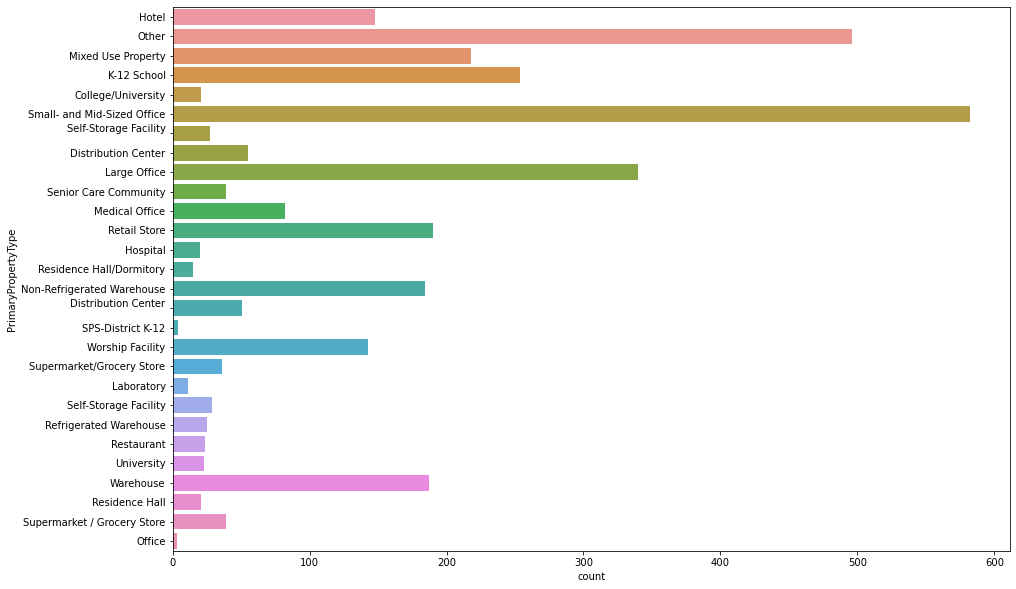

In [74]:
plt.figure(figsize=(15, 10))
sns.countplot(y='PrimaryPropertyType', data=df)

In [75]:
df.LargestPropertyUseType.unique()


array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       nan, 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Public S

In [76]:
dictionary = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Performing Arts': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center': 'Leisure',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',
                
                'K-12 School' : 'Education',
                'Other - Education': 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

In [77]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace(dictionary)

In [78]:
df.LargestPropertyUseType.unique()

array(['Hotel/Senior Care/Housing', 'Police Station',
       'Other - Entertainment/Public Assembly', nan, 'Education',
       'Leisure', 'Courthouse', 'Other', 'Retail', 'Office',
       'Self-Storage Facility', 'Health',
       'Hospital (General Medical & Surgical)',
       'Other/Specialty Hospital', 'Non-Refrigerated Warehouse',
       'Distribution Center', 'Parking', 'Laboratory',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Refrigerated Warehouse', 'Data Center',
       'Manufacturing/Industrial Plant', 'Fire Station',
       'Other - Utility', 'Outpatient Rehabilitation/Physical Therapy',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Prison/Incarceration'], dtype=object)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3267 non-null   int64  
 1   BuildingType               3267 non-null   object 
 2   PrimaryPropertyType        3267 non-null   object 
 3   Neighborhood               3267 non-null   object 
 4   NumberofBuildings          3267 non-null   float64
 5   NumberofFloors             3267 non-null   float64
 6   PropertyGFATotal           3267 non-null   int64  
 7   PropertyGFAParking         3267 non-null   int64  
 8   PropertyGFABuilding(s)     3267 non-null   int64  
 9   LargestPropertyUseType     3197 non-null   object 
 10  LargestPropertyUseTypeGFA  3197 non-null   float64
 11  ENERGYSTARScore            2188 non-null   float64
 12  SiteEnergyUse(kBtu)        3259 non-null   float64
 13  SteamUse(kBtu)             3259 non-null   float

In [80]:
df_sans_score=df.drop('ENERGYSTARScore', axis=1)

In [81]:
df_sans_score=df_sans_score.dropna(axis=0, how='any')

In [82]:
df_sans_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3375
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3191 non-null   int64  
 1   BuildingType               3191 non-null   object 
 2   PrimaryPropertyType        3191 non-null   object 
 3   Neighborhood               3191 non-null   object 
 4   NumberofBuildings          3191 non-null   float64
 5   NumberofFloors             3191 non-null   float64
 6   PropertyGFATotal           3191 non-null   int64  
 7   PropertyGFAParking         3191 non-null   int64  
 8   PropertyGFABuilding(s)     3191 non-null   int64  
 9   LargestPropertyUseType     3191 non-null   object 
 10  LargestPropertyUseTypeGFA  3191 non-null   float64
 11  SiteEnergyUse(kBtu)        3191 non-null   float64
 12  SteamUse(kBtu)             3191 non-null   float64
 13  Electricity(kBtu)          3191 non-null   float

In [83]:
df_sans_score.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
count,3191.000000,3191.000000,3191.000000,3.191000e+03,3191.000000,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3.191000e+03,3191.000000,3191.000000
mean,16027.041366,1.134754,4.139141,1.158207e+05,13384.140081,1.024366e+05,9.530470e+04,8.133271e+06,4.867300e+05,5.673653e+06,1.904600e+06,178.275525,54.014416
std,13337.383426,2.254779,6.617357,2.540040e+05,43959.185056,2.367210e+05,2.286185e+05,2.561856e+07,5.249499e+06,1.764861e+07,8.027895e+06,674.340438,32.785019
min,1.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,1.000000
25%,587.000000,1.000000,1.000000,2.939200e+04,0.000000,2.834400e+04,2.545000e+04,1.233459e+06,0.000000e+00,7.265775e+05,0.000000e+00,20.070000,27.000000
50%,21138.000000,1.000000,2.000000,4.878900e+04,0.000000,4.671000e+04,4.285000e+04,2.520919e+06,0.000000e+00,1.615057e+06,4.960960e+05,49.440000,50.000000
75%,24543.000000,1.000000,4.000000,1.041480e+05,0.000000,9.400200e+04,8.975950e+04,6.916286e+06,0.000000e+00,4.896583e+06,1.487977e+06,139.225000,86.000000
max,50226.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,116.000000


In [84]:
df_sans_score[df_sans_score['PropertyGFATotal']>9000000]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
3274,49967,Campus,University,NORTHEAST,111.0,1.0,9320156,0,9320156,Education,9320156.0,873923712.0,84985240.0,657074389.0,0.0,11140.56,116


In [85]:
index_to_drop=df_sans_score[df_sans_score['PropertyGFATotal']>9000000].index
df_sans_score.drop(index_to_drop, inplace=True)

In [86]:
df_sans_score.loc[(df_sans_score['SteamUse(kBtu)']>0.000000e+00)] 

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
0,1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,0,88434,Hotel/Senior Care/Housing,88434.0,6981428.0,2023032.00,3686160.0,1272388.0,249.43,88
2,3,NonResidential,Hotel,DOWNTOWN,1.0,41.0,961990,0,961990,Hotel/Senior Care/Housing,757243.0,73130656.0,19660404.00,49762435.0,3709900.0,2061.48,46
3,5,NonResidential,Hotel,DOWNTOWN,1.0,10.0,61320,0,61320,Hotel/Senior Care/Housing,61320.0,28229320.0,23458518.00,2769023.0,2001894.0,1936.34,89
7,11,NonResidential,Other,DOWNTOWN,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,6426022.0,2003108.00,4108004.0,315079.0,199.99,89
11,16,NonResidential,Hotel,DOWNTOWN,1.0,25.0,333176,61161,272015,Hotel/Senior Care/Housing,336640.0,27717026.0,5426396.00,19058722.0,3232700.0,723.40,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,32429,NonResidential,Restaurant,DOWNTOWN,1.0,13.0,42000,0,42000,Leisure,26554.0,7798464.0,2513519.25,4351882.0,933062.0,273.91,31
3156,45927,NonResidential,Laboratory,EAST,1.0,8.0,178000,0,178000,Laboratory,181930.0,53166156.0,31030194.00,22135959.0,0.0,2549.47,16
3182,49725,NonResidential,Other,EAST,1.0,7.0,267470,0,267470,Other,160482.0,42584028.0,18547858.00,23795911.0,0.0,1597.56,4
3261,49926,NonResidential,University,EAST,1.0,3.0,428347,0,428347,Education,472384.0,37022180.0,13556219.00,21930618.0,1535341.0,1280.81,91


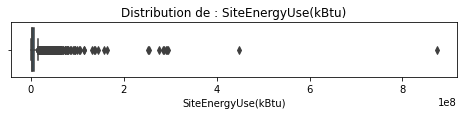

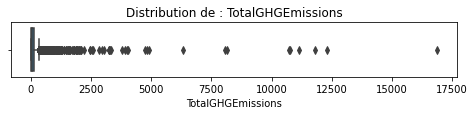

In [87]:
# •Représenter visuellement et comparer la distribution des variables target, à l'aide par exemple d'un boxplot.

var_num = df_sans_score[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

Je supprime certaines lignes avec des valeurs extrêmes d'émissions de co2 Je supprime les 5% des valeurs les plus élevées et les 5% des valeurs les plus basses, je les considère comme des valeurs aberrantes

In [88]:
borne=round(np.percentile(df_sans_score["TotalGHGEmissions"].values, 95),2)
df_sans_score=df_sans_score.loc[df_sans_score["TotalGHGEmissions"]<borne]
borne2=round(np.percentile(df_sans_score["TotalGHGEmissions"].values, 5),2)
df_sans_score=df_sans_score.loc[df_sans_score["TotalGHGEmissions"]>borne2]

In [89]:
borne=round(np.percentile(df_sans_score["SiteEnergyUse(kBtu)"].values, 95),2)
df_sans_score=df_sans_score.loc[df_sans_score["SiteEnergyUse(kBtu)"]<borne]
borne2=round(np.percentile(df_sans_score["SiteEnergyUse(kBtu)"].values, 5),2)
df_sans_score=df_sans_score.loc[df_sans_score["SiteEnergyUse(kBtu)"]>borne2]

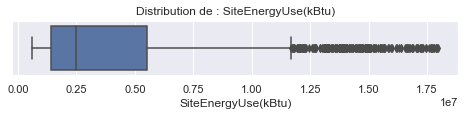

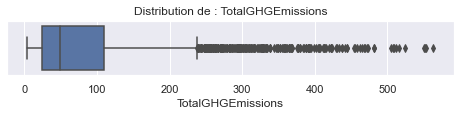

In [90]:
# •Représenter visuellement et comparer la distribution des variables target, à l'aide par exemple d'un boxplot.

var_num = df_sans_score[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df_sans_score[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

# Analyse exploratoire & Feature Engineering

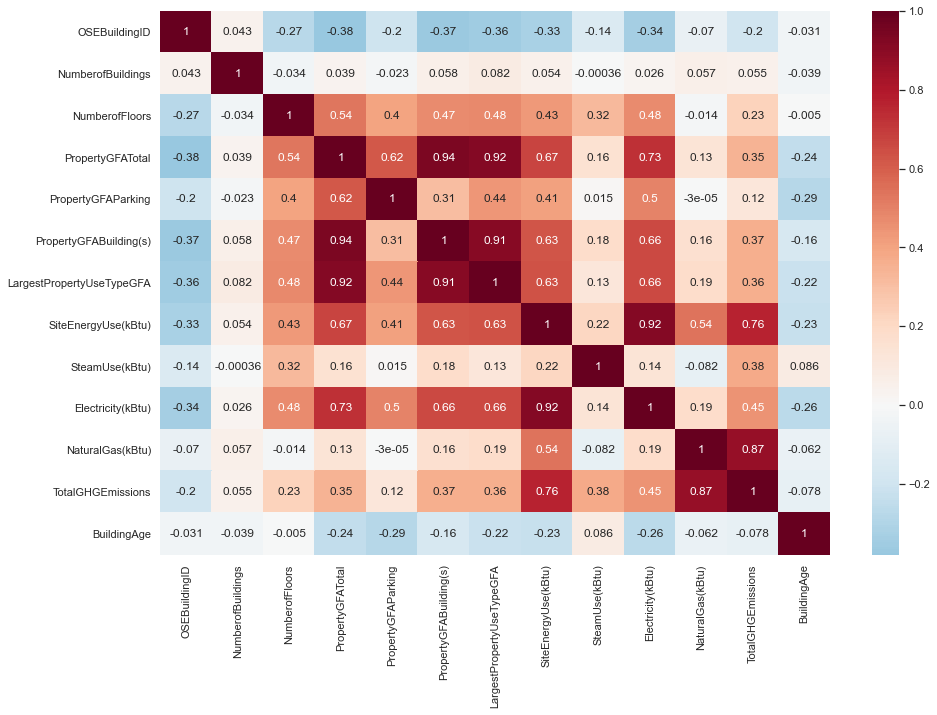

In [109]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_sans_score.corr(), annot=True, cmap='RdBu_r', center=0);

+ TotalGHGEmissions
+ SiteEnergyUse(kBtu)

In [110]:
corr = df_sans_score.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

Les fortes corrélations visibles sur le heatmap peuvent amener des problèmes de colinéarité dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [111]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
12,PropertyGFABuilding(s),PropertyGFATotal,0.938133
10,LargestPropertyUseTypeGFA,PropertyGFATotal,0.915485
8,Electricity(kBtu),SiteEnergyUse(kBtu),0.915398
6,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.912972
4,TotalGHGEmissions,NaturalGas(kBtu),0.865271
2,TotalGHGEmissions,SiteEnergyUse(kBtu),0.763671
0,Electricity(kBtu),PropertyGFATotal,0.725782


In [112]:
# df=df.drop('PropertyGFATotal', axis=1)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, PropertyGFAParking, PropertyGFABuilding(s).

In [109]:
# #On calcule les ratios

df_sans_score['GFABuildingRate'] = (round((df_sans_score['PropertyGFABuilding(s)'] /df_sans_score['PropertyGFATotal']),5))

df_sans_score['GFAParkingRate'] = (round((df_sans_score['PropertyGFAParking'] /df_sans_score['PropertyGFATotal']),5))
                                                               

In [110]:
#On supprime les variables inutiles
df_sans_score = df_sans_score.drop(['LargestPropertyUseTypeGFA', 
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1)

In [111]:
df_sans_score=df_sans_score.set_index('OSEBuildingID')

In [112]:
df_sans_score.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,,,,,,,
1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,Hotel/Senior Care/Housing,6981428.0,2023032.0,3686160.0,1272388.0,249.43,88,1.00000,0.00000
2,NonResidential,Hotel,DOWNTOWN,1.0,11.0,103566,Hotel/Senior Care/Housing,8354235.0,0.0,3905411.0,4448985.0,263.51,19,0.85455,0.14545
8,NonResidential,Hotel,DOWNTOWN,1.0,18.0,119890,Hotel/Senior Care/Housing,14829099.0,0.0,6066245.0,8763105.0,507.70,35,0.89607,0.10393
9,Nonresidential COS,Other,DOWNTOWN,1.0,2.0,97288,Police Station,12051984.0,0.0,7271004.0,4781283.0,304.62,16,0.61765,0.38235
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,83008,Hotel/Senior Care/Housing,6252842.0,0.0,2679698.0,3573255.0,208.46,89,1.00000,0.00000


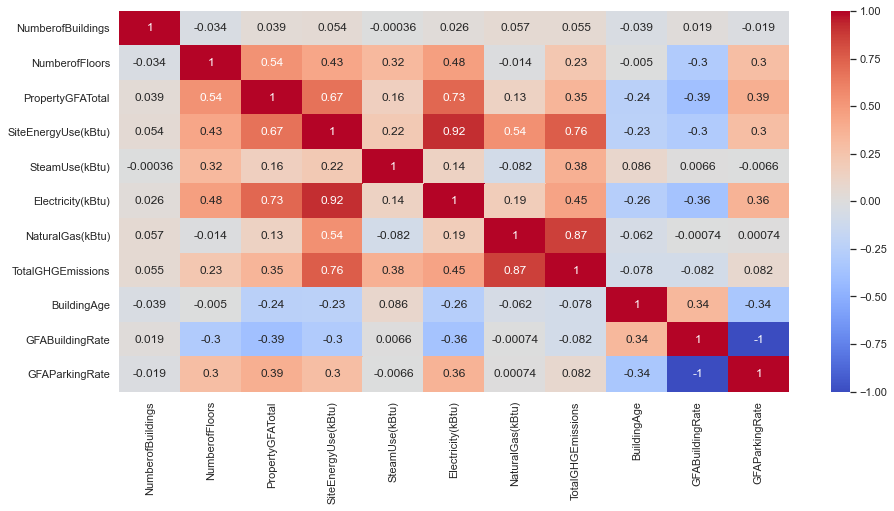

In [117]:
# Création d'une matrice de corrélation variable

cor = df_sans_score.corr()
plt.figure(figsize = (15,7))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');


In [118]:
corr = df_sans_score.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.7)).any(axis=0)]
display(corr_columns)

Index(['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [119]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
8,SiteEnergyUse(kBtu),Electricity(kBtu),0.915398
6,TotalGHGEmissions,NaturalGas(kBtu),0.865271
4,TotalGHGEmissions,SiteEnergyUse(kBtu),0.763671
2,PropertyGFATotal,Electricity(kBtu),0.725782
0,GFABuildingRate,GFAParkingRate,-1.000000


Vérification de multicolinéarité avec le VIF (Variance Inflation Factor) :
VIF=1/1-R*R

Des scores VIF supérieur à 5 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.

Проверка мультиколлинеарности с помощью VIF (фактор инфляции дисперсии):
ВИФ=1/1-R*R

Показатели VIF выше 5 обычно указывают на сильную мультиколлинеарность. Эти сильно коррелированные переменные могут повлиять на наши модели.

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df_sans_score[strong_corr_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

,feature,VIF
1,NaturalGas(kBtu),10.686598
2,SiteEnergyUse(kBtu),369.819640
3,TotalGHGEmissions,44.234711
6,Electricity(kBtu),208.862151


In [121]:
df_emission=df_sans_score.drop(['SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)

In [122]:
enc = OneHotEncoder()
scaler = StandardScaler()

In [123]:
# df.select_dtypes(include=['object'])
# df.select_dtypes(exclude=['object'])

In [124]:
df_num1=df_emission.select_dtypes(exclude=['object'])
df_num1=df_num1.drop('TotalGHGEmissions', axis=1)
df_num1.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,
1,1.0,12.0,88434,2023032.0,88,1.00000,0.00000
2,1.0,11.0,103566,0.0,19,0.85455,0.14545
8,1.0,18.0,119890,0.0,35,0.89607,0.10393
9,1.0,2.0,97288,0.0,16,0.61765,0.38235
10,1.0,11.0,83008,0.0,89,1.00000,0.00000


In [125]:
scaler.fit(df_num1)


df_num1[df_num1.columns] = pd.DataFrame(scaler.transform(df_num1), index= df_num1.index)

df_num1=pd.concat([df_num1, df_emission.TotalGHGEmissions], axis=1)
df_num1.head()


,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,TotalGHGEmissions
OSEBuildingID,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,1.017751,0.435931,-0.435931,249.43
2,-0.102734,2.631027,0.328993,-0.185390,-1.069010,-0.593195,0.593195,263.51
8,-0.102734,4.994867,0.530279,-0.185390,-0.585123,-0.299422,0.299422,507.70
9,-0.102734,-0.408196,0.251581,-0.185390,-1.159739,-2.269373,2.269373,304.62
10,-0.102734,2.631027,0.075499,-0.185390,1.047994,0.435931,-0.435931,208.46


In [126]:
print(df_num1.shape)


(2596, 8)


In [127]:
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 1 to 50226
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NumberofBuildings  2596 non-null   float64
 1   NumberofFloors     2596 non-null   float64
 2   PropertyGFATotal   2596 non-null   float64
 3   SteamUse(kBtu)     2596 non-null   float64
 4   BuildingAge        2596 non-null   float64
 5   GFABuildingRate    2596 non-null   float64
 6   GFAParkingRate     2596 non-null   float64
 7   TotalGHGEmissions  2596 non-null   float64
dtypes: float64(8)
memory usage: 182.5 KB


In [128]:
df_cat=df_emission.select_dtypes(include=['object'])
df_cat.head()


,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
OSEBuildingID,,,,
1,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
2,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
8,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
9,Nonresidential COS,Other,DOWNTOWN,Police Station
10,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing


In [129]:
df_cat.shape

(2596, 4)

In [130]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 1 to 50226
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BuildingType            2596 non-null   object
 1   PrimaryPropertyType     2596 non-null   object
 2   Neighborhood            2596 non-null   object
 3   LargestPropertyUseType  2596 non-null   object
dtypes: object(4)
memory usage: 101.4+ KB


In [131]:
array = enc.fit_transform(df_cat).toarray()
print(array.shape)

(2596, 68)


In [132]:

colnames=enc.get_feature_names(['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType'])
colnames


array(['BuildingType_Campus', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS',
       'BuildingType_SPS-District K-12',
       'PrimaryPropertyType_College/University',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Distribution Center\n',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Non-Refrigerated Warehouse',
       'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall',
       'PrimaryPropertyType_Residence Hall/Dormitory',
       'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
     

In [133]:
df_cat = pd.DataFrame(array,index=df_cat.index, columns=colnames)
df_cat.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
df_cat.shape

# Когда переменная категории принимает много значений, например более 15 категорий, эффект кодирования One-Hot не идеален.
# When a category variable takes on many values, such as more than 15 categories, the One-Hot encoding effect is not ideal.

(2596, 68)

In [135]:
df_emission=pd.concat([df_num1,df_cat], axis=1)
df_emission.head()


,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,TotalGHGEmissions,BuildingType_Campus,BuildingType_NonResidential,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,1.017751,0.435931,-0.435931,249.43,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.102734,2.631027,0.328993,-0.185390,-1.069010,-0.593195,0.593195,263.51,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.102734,4.994867,0.530279,-0.185390,-0.585123,-0.299422,0.299422,507.70,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.102734,-0.408196,0.251581,-0.185390,-1.159739,-2.269373,2.269373,304.62,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,-0.102734,2.631027,0.075499,-0.185390,1.047994,0.435931,-0.435931,208.46,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
df_emission.shape

(2596, 76)

In [137]:
df1=df_emission

In [138]:
df1.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,TotalGHGEmissions,BuildingType_Campus,BuildingType_NonResidential,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,1.017751,0.435931,-0.435931,249.43,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.102734,2.631027,0.328993,-0.185390,-1.069010,-0.593195,0.593195,263.51,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.102734,4.994867,0.530279,-0.185390,-0.585123,-0.299422,0.299422,507.70,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.102734,-0.408196,0.251581,-0.185390,-1.159739,-2.269373,2.269373,304.62,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,-0.102734,2.631027,0.075499,-0.185390,1.047994,0.435931,-0.435931,208.46,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


+ Entraînez des  modèles prédictif linéaire

In [139]:
# + Коэффициент корреляции r-Пирсона характеризует существование линейной связи между двумя величинами. Он позволяет определить, насколько пропорциональная изменчивость двух переменных.
# + Коэффициент корреляции Спирмена (Spearman rank correlation coefficient) — мера линейной связи между случайными величинами. Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги. Показатель показывает, как отличается полученная при наблюдении сумма квадратов разностей между рангами от случая отсутствия связи.
# + Le coefficient de corrélation r-Pearson caractérise l'existence d'une relation linéaire entre deux grandeurs. Il vous permet de déterminer la proportionnalité de la variabilité de deux variables.
# + Le coefficient de corrélation du rang de Spearman est une mesure de la relation linéaire entre les variables aléatoires. La corrélation de Spearman est un rang un, c'est-à-dire que ce ne sont pas des valeurs numériques qui sont utilisées pour évaluer la force de la connexion, mais les rangs qui leur correspondent. L'indicateur montre comment la somme observée des différences au carré entre les rangs diffère du cas d'absence de connexion.

In [140]:
df1.shape

(2596, 76)

In [141]:
# Séparer la variable cible 'TotalGHGEmissions' dans target et le reste des variables dans data
target = df1['TotalGHGEmissions']
data = df1.drop('TotalGHGEmissions', axis=1)

In [142]:
print(target.shape)
print(data.shape)

(2596,)
(2596, 75)


In [143]:
# Séparer les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test(X_test, y_test), 
#  avec 20% des données originales pour le test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2076, 75), (520, 75), (2076,), (520,))

+ La baseline : une régression classique

In [145]:
# On crée un modèle de régression linéaire
lr = LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
mse_lr = np.mean((lr.predict(X_test) - y_test) ** 2)

print('Mean Squared Error du LinearRegression =', mse_lr)

# Среднеквадратическая ошибка MSE(Mean Squared Error)
# Чем меньше ошибка, тем лучше

Mean Squared Error du LinearRegression = 5.6231633928674434e+23


In [146]:
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

print("mse du lr train:", mean_squared_error(lr_pred_train, y_train))
print("mse du lr test:", mean_squared_error(lr_pred_test, y_test))


# train ≈ 68.2498205487816
# test ≈ 74987754952841760000

mse du lr train: 4658.0380049408905
mse du lr test: 5.6231633928674434e+23


In [147]:
print("le score (R²) du modèle LinearRegression sur l'ensemble d'entraînement:", lr.score(X_train, y_train))
print("le score (R²) du modèle LinearRegression sur l'ensemble de test:", lr.score(X_test, y_test))

# Что значит R квадрат?
# R - квадрат – это коэффициент линейной детерминации. Коэффициент является одним из наиболее эффективных оценок 
# адекватности регрессионной модели R2, мерой качества уравнения регрессии в целом (или, как говорят, 
# мерой качества подгонки регрессионной модели к соблюдаемым значениям.

le score (R²) du modèle LinearRegression sur l'ensemble d'entraînement: 0.49652705143747444
le score (R²) du modèle LinearRegression sur l'ensemble de test: -6.38283097863423e+19


In [148]:
from sklearn.metrics import r2_score

print('MSE train:',
        mean_squared_error(y_train, lr_pred_train),
        mean_squared_error(y_test, lr_pred_test))
print('R^2 train:',
        r2_score(y_train, lr_pred_train),
        r2_score(y_test, lr_pred_test))

MSE train: 4658.0380049408905 5.6231633928674434e+23
R^2 train: 0.49652705143747444 -6.38283097863423e+19


+ Application de la régression ridge

L'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. On doit trouver un coefficient de régularisation adapté. On appelle ce coefficient alpha, on va en tester un certain nombre afin de trouver celui qui est optimal.

In [149]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

On peut maintenant tester toute les régressions ridges avec les différentes valeur de l'hyperparamètre α . On récupère les poids des différents coefficients de la régression associées ainsi que l'erreur quadratique.

In [150]:
ridge = Ridge()

coefs = []
mse_ridge=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    mse_ridge.append(np.mean((ridge.predict(X_test) - y_test) ** 2)) 

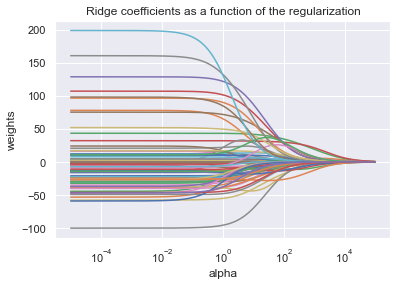

In [151]:
# On peut afficher l'évolution de la valeur des différents poids associés aux paramètres

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


Comme on peut le voir, la régularisation ne diminue  pas l'erreur sur le jeu de données test.

In [152]:
print('Min Mean Squared Error du Ridge =', min(mse_ridge))

# Линейная регрессия показывает немного лучше результат, у нее ошибка меньше
# La régression lineare montre un résultat meilleur, elle a moins d'erreur

#  ≈ 75.6598043073213

Min Mean Squared Error du Ridge = 5724.405987822153


In [153]:
ridge_CV = RidgeCV(alphas= alphas)
ridge_CV.fit(X_train, y_train)


print(' le α  retenu par le modèle:', ridge_CV.alpha_)
print("le score (R²) du modèle Ridge sur l'ensemble d'entraînement:", ridge_CV.score(X_train, y_train))
print("le score (R²) du modèle Ridge sur l'ensemble de test:", ridge_CV.score(X_test, y_test))


# coefficient de détermination R2 (коэффициент детерминации) коэффициент детерминации говорит нам, 
# насколько близко прогнозируемые значения коррелируют с истинными значениями.
# !!! Внимание, если прогнозы сильно антикоррелированы с истинными значениями, коэффициент детерминации также будет высоким.
# Чем ближе к 1, тем лучше.

 le α  retenu par le modèle: 1.1895340673703207
le score (R²) du modèle Ridge sur l'ensemble d'entraînement: 0.49513163865627896
le score (R²) du modèle Ridge sur l'ensemble de test: 0.3445352386568924


In [154]:
# À partir du graphique affiché, créer un modèle de régression Ridge performant
# Tester les performances de ce modèle sur X_test

ridge_best=Ridge(alpha=1.1895340673703207)
ridge_best.fit(X_train, y_train)

print("le score (R²) du modèle Ridge avec meilleur alpha sur l'ensemble d'entraînement:", ridge_best.score(X_train, y_train))
print("le score (R²) du modèle Ridge avec meilleur alpha sur l'ensemble de test:", ridge_best.score(X_test, y_test))

ridge_pred_train = ridge_best.predict(X_train)
ridge_pred_test = ridge_best.predict(X_test)

print("mse du Ridge train:", mean_squared_error(ridge_pred_train, y_train))
print("mse du Ridge test:", mean_squared_error(ridge_pred_test, y_test))

# mse train   ≈ 68.34433483657561
# mse test    ≈ 75.99033404490892

le score (R²) du modèle Ridge avec meilleur alpha sur l'ensemble d'entraînement: 0.4951316386562792
le score (R²) du modèle Ridge avec meilleur alpha sur l'ensemble de test: 0.34453523865693103
mse du Ridge train: 4670.948104253963
mse du Ridge test: 5774.530868256844


+ Application du Lasso

In [155]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)

In [156]:
lasso = Lasso()

coefs = []
mse_lasso = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    mse_lasso.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1467314.0963239959, tolerance: 1920.6765578699956
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1467315.295525331, tolerance: 1920.6765578699956
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1467316.5559826307, tolerance: 1920.6765578699956
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

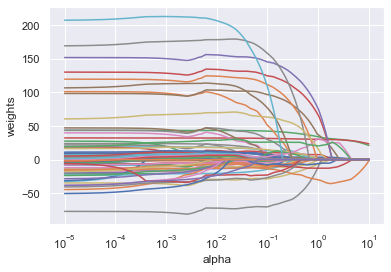

In [157]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

+ Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.
+ Как мы видим, лассо позволяет удалять переменные, устанавливая их вес равным нулю. Это тот случай, когда две переменные коррелированы. Один будет выбран лассо, другой удален. Это также является его преимуществом перед гребневой регрессией, которая не выбирает переменные.

In [158]:
print('Min Mean Squared Error du Lasso =', min(mse_lasso))

# Лассо очень плохой результат

# ≈ 75.86677391437033

Min Mean Squared Error du Lasso = 5755.7673841741835


In [159]:
# Créer un modèle de régression Lasso qui choisira le paramètre αα parmi alphas par validation croisée,
# grâce à la fonction LassoCV.
# Afficher les performances du modèle sur l'échantillon de test.

lasso_best=LassoCV(alphas=alphas)
lasso_best.fit(X_train, y_train)
print(' le α  retenu par le modèle:', lasso_best.alpha_)

print("score train du modèle Lasso:",lasso_best.score(X_train,y_train))
print("score test du modèle Lasso:", lasso_best.score(X_test,y_test))

lasso_pred_train = lasso_best.predict(X_train)
lasso_pred_test=lasso_best.predict(X_test)

print("mse train du modèle Lasso:", mean_squared_error(lasso_pred_train, y_train))
print("mse test du modèle Lasso:", mean_squared_error(lasso_pred_test, y_test))

# rmse train  ≈ 68.424819252904
# rmse test   ≈ 76.0307493296144

 le α  retenu par le modèle: 0.06203576476104275
score train du modèle Lasso: 0.4939418410985106
score test du modèle Lasso: 0.3438378383938224
mse train du modèle Lasso: 4681.955889792582
mse test du modèle Lasso: 5780.674843622659


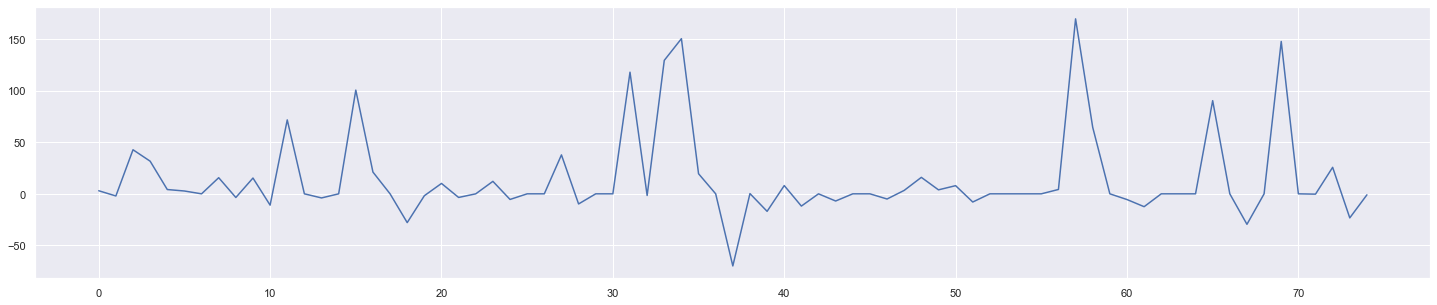

In [160]:
# À partir des coefficients retournés par le modèle de régression Lasso, afficher le nombre de variables gardés et 
# le nombre de variables éliminés par le modèle
lasso_coef = lasso_best.coef_

plt.figure(figsize = (25,5))
plt.plot(range(len(data.columns)), lasso_coef)
plt.show()

In [161]:
coeff_used = np.sum(lasso_best.coef_!=0)
coeff_useless = np.sum(lasso_best.coef_==0)
print('Le nombre de variables gardés:', coeff_used)
print('Le nombre de variables éliminés par le modèle:', coeff_useless)

Le nombre de variables gardés: 52
Le nombre de variables éliminés par le modèle: 23


In [162]:
# Afficher les variables les plus importantes du modèle, relativement aux coefficients calculés

nom_var = data.columns

coefs = lasso_coef

df_lasso = pd.DataFrame({'Variables':nom_var,'Coefficients':coefs})
df_lasso = df_lasso[df_lasso.Coefficients !=0]
df_lasso = df_lasso.sort_values(by='Coefficients')
df_lasso

,Variables,Coefficients
37,PrimaryPropertyType_Worship Facility,-6.997913e+01
67,LargestPropertyUseType_Parking,-2.958867e+01
18,PrimaryPropertyType_Large Office,-2.792417e+01
73,LargestPropertyUseType_Self-Storage Facility,-2.333139e+01
39,Neighborhood_CENTRAL,-1.698918e+01
61,LargestPropertyUseType_Office,-1.247446e+01
41,Neighborhood_DOWNTOWN,-1.189282e+01
10,BuildingType_SPS-District K-12,-1.098907e+01
28,PrimaryPropertyType_Retail Store,-9.817673e+00
51,LargestPropertyUseType_Distribution Center,-7.948960e+00


Les variables les plus importantes du modèle, relativement aux coefficients calculés (positif): LargestPropertyUseType_Laboratory, PrimaryPropertyType_Supermarket/Grocery Store, LargestPropertyUseType_Police Station, PrimaryPropertyType_Supermarket / Grocery Store, PrimaryPropertyType_Senior Care Community.


    
Les variables les plus importantes du modèle, relativement aux coefficients calculés (négatif): PrimaryPropertyType_Worship Facility, LargestPropertyUseType_Parking, PrimaryPropertyType_Large Office, LargestPropertyUseType_Self-Storage Facility, Neighborhood_CENTRAL.





Les SVM à noyaux sont implémentées dans scikit-learn dans les classes sklearn.svm.SVC pour la classification et sklearn.svm.SVR pour la régression. Dans ces deux classes, vous pouvez spécifier un noyau grâce au paramètre « kernel ». Ce noyau peut être un des grands classiques (linéaire, polynomial, RBF), mais vous pouvez aussi définir vos propres noyaux.

In [163]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01

regressor = SVR(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement

regressor.fit(X_train, y_train)

SVR(gamma=0.01, kernel='linear')

In [164]:
score = regressor.score(X_test, y_test)
score

0.2736128789480483

In [165]:
regressor = SVR()

# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range,
              'gamma': gamma_range,
              'kernel': ['rbf', 'linear']}

# initialiser une recherche sur grille
grid_reg_svr = model_selection.GridSearchCV(estimator=regressor, 
                                    param_grid=param_grid, 
                                    cv=5) # 5 folds de validation croisé

# faire tourner la recherche sur grille
grille = grid_reg_svr.fit(X_train, y_train)

pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
                                    
print(grille.best_params_)

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [166]:
regressor_best=SVR(kernel='rbf', gamma=0.1, C= 1000.0)

In [167]:
# Entraîner la SVM sur le jeu d'entraînement

regressor_best.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [168]:
svr_pred_train = regressor_best.predict(X_train)
svr_pred_test = regressor_best.predict(X_test)

print("mse du svr train:", mean_squared_error(svr_pred_train, y_train))
print("mse du svr test:", mean_squared_error(svr_pred_test, y_test))

# rmse train  ≈ 44.88946143128841
# rmse test   ≈ 62.90314608059792

mse du svr train: 2015.0637475911296
mse du svr test: 3956.805786837042


In [169]:
score = regressor_best.score(X_test, y_test)
score

0.5508645083175512

+ AdaBoost

In [170]:
ADBregr = AdaBoostRegressor()
parametres_adb = {'n_estimators' :[(i) for i in range (2,150)]} 
grid_adb = GridSearchCV(estimator=ADBregr, param_grid=parametres_adb)
grille = grid_adb.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

{'n_estimators': 2}


In [179]:
ADBregr = AdaBoostRegressor(random_state = 0,n_estimators = 2)
ADBregr.fit(X_train, y_train)

# https://www.tutorialspoint.com/scikit_learn/scikit_learn_boosting_methods.htm

AdaBoostRegressor(n_estimators=2, random_state=0)

In [180]:
ADBregr_pred_train = ADBregr.predict(X_train)
ADBregr_pred_test = ADBregr.predict(X_test)

print("mse du AdaBoostRegressor train:", mean_squared_error(ADBregr_pred_train, y_train))
print("mse du AdaBoostRegressor test:", mean_squared_error(ADBregr_pred_test, y_test))

mse du AdaBoostRegressor train: 6618.818503940444
mse du AdaBoostRegressor test: 6250.482597812983


In [181]:
print("le score (R²) du modèle AdaBoostRegressor sur l'ensemble d'entraînement:", ADBregr.score(X_train, y_train))
print("le score (R²) du modèle LinearRegression sur l'ensemble de test:", ADBregr.score(X_test, y_test))

le score (R²) du modèle AdaBoostRegressor sur l'ensemble d'entraînement: 0.2845923402418896
le score (R²) du modèle LinearRegression sur l'ensemble de test: 0.29051014225658756


+ A decision tree regressor

In [182]:
dtr = DecisionTreeRegressor()

parametres_dtr = {'max_depth' :[(i) for i in range (2,30)]} 
grid_dtr = GridSearchCV(estimator=dtr, param_grid=parametres_dtr)
grille = grid_dtr.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

{'max_depth': 8}


In [183]:
dtr = DecisionTreeRegressor(max_depth = 8)  # La construction des arbres de décision comme modèle de classification 
                                            # se fait en spécifiant la profondeur maximale max_depth.
dtr.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# пробовать разные методы как для кнн

DecisionTreeRegressor(max_depth=8)

In [184]:
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)

print("mse du DecisionTreeRegressor train:", mean_squared_error(dtr_pred_train, y_train))
print("mse du DecisionTreeRegressor test:", mean_squared_error(dtr_pred_test, y_test))

mse du DecisionTreeRegressor train: 3746.3125076505544
mse du DecisionTreeRegressor test: 4803.854370398746


In [185]:
print("le score (R²) du modèle DecisionTreeRegressor sur l'ensemble d'entraînement:", dtr.score(X_train, y_train))
print("le score (R²) du modèle DecisionTreeRegressor sur l'ensemble de test:", dtr.score(X_test, y_test))


# Calculer l'accuracy (taux de bonnes prédiction) du modèle 

le score (R²) du modèle DecisionTreeRegressor sur l'ensemble d'entraînement: 0.5950726459374543
le score (R²) du modèle DecisionTreeRegressor sur l'ensemble de test: 0.4547163518114872


In [178]:
ADBregr_best = AdaBoostRegressor(base_estimator= dtr)
parametres_adb = {'n_estimators' :[(i) for i in range (2,150)]} 
grid_adb = GridSearchCV(estimator=ADBregr_best, param_grid=parametres_adb)
grille = grid_adb.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

KeyboardInterrupt: 

In [186]:
# Création du classifier et construction du modèle sur les données d'entraînement
ADBregr = AdaBoostRegressor(base_estimator= dtr, n_estimators=8)
ADBregr.fit(X_train, y_train)

ADBregr_pred_train = ADBregr.predict(X_train)
ADBregr_pred_test = ADBregr.predict(X_test)

print("mse du AdaBoostRegressor train:", mean_squared_error(ADBregr_pred_train, y_train))
print("mse du AdaBoostRegressor test:", mean_squared_error(ADBregr_pred_test, y_test))

# Calcul de l'accuracy
print("le score (R²) du modèle AdaBoostRegressor sur l'ensemble d'entraînement:", ADBregr.score(X_train, y_train))
print("le score (R²) du modèle LinearRegression sur l'ensemble de test:", ADBregr.score(X_test, y_test))

mse du AdaBoostRegressor train: 2784.879559946928
mse du AdaBoostRegressor test: 4448.381460208601
le score (R²) du modèle AdaBoostRegressor sur l'ensemble d'entraînement: 0.6989909653054063
le score (R²) du modèle LinearRegression sur l'ensemble de test: 0.4950659441086783


+ RandomForestRegressor

In [337]:
# RandomForest. Hyperparamètres à régler :
# •'max_features': "sqrt", "log2", None
# •'min_samples_split': Nombres pairs allant de 2 à 30.

RFregr = RandomForestRegressor()
parametres_rf = {'max_features':  ["sqrt", "log2", None, 'auto'],
              'min_samples_split': [(i) for i in range (2,31,2)]}
grid_RFregr = model_selection.GridSearchCV(estimator=RFregr, param_grid=parametres_rf)
grille = grid_RFregr.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

{'max_features': None, 'min_samples_split': 2}


In [338]:
RFregr_best = RandomForestRegressor(max_features = 'auto', min_samples_split = 2)
RFregr_best.fit(X_train, y_train)

RandomForestRegressor()

In [339]:
RFregr_pred_train = RFregr_best.predict(X_train)
RFregr_pred_test = RFregr_best.predict(X_test)

print("mse du RandomForestRegressor train:", mean_squared_error(RFregr_pred_train, y_train))
print("mse du RandomForestRegressor test:", mean_squared_error(RFregr_pred_test, y_test))

# Calcul de l'accuracy
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement:", RFregr_best.score(X_train, y_train))
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble de test:", RFregr_best.score(X_test, y_test))

# train всегда лучше, чем test

mse du RandomForestRegressor train: 282.6580392417185
mse du RandomForestRegressor test: 2976.5959281651435
le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement: 0.964566027658725
le score (R²) du modèle RandomForestRegressor sur l'ensemble de test: 0.6796894366567874


In [190]:
# трэйн всегда гуд, тест не очень хороший

In [191]:
#function returning dictionary of model performances on the dataset received as argument
#We work with the r2 scores obtained after a cross validation, with 10 splits

#функция, возвращающая словарь производительности модели для набора данных, полученного в качестве аргумента
# Мы работаем с оценками r2, полученными после перекрестной проверки, с 10 разделениями
    
def lets_try(train, y):
    results = {}
    
    def test_model(regressor):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(regressor, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    regressor = LinearRegression()
    results["Linear"] = test_model(regressor)
    print("Linear done")
    
    regressor = Ridge(alpha=1.1895340673703207)
    results["Ridge"] = test_model(regressor)
    print("Ridge done")

    regressor = BayesianRidge()
    results["Bayesian Ridge"] = test_model(regressor)
    print("Bayesian Ridge done")

    regressor = Lasso(alpha=0.06203576476104275)
    results["Lasso"] = test_model(regressor)
    print("Lasso done.")

    regressor = BaggingRegressor()
    results["Bagging"] = test_model(regressor)
    print("Baggind done")

    regressor =RandomForestRegressor(max_features = None, min_samples_split = 2)
    results["RandomForest"] = test_model(regressor)
    print("Random forest done")
    
    regressor = AdaBoostRegressor(base_estimator= dtr, n_estimators=10)
    results["AdaBoost"] = test_model(regressor)
    print("Adaboost done")

    regressor =SVR(kernel='rbf', gamma=0.1, C= 1000.0)
    results["SVR RBF"] = test_model(regressor)
    print("SVR rbf done")

   
    return results 

In [192]:
dico_results=lets_try(X_train,y_train)

Linear done
Ridge done
Bayesian Ridge done
Lasso done.
Baggind done
Random forest done
Adaboost done
SVR rbf done


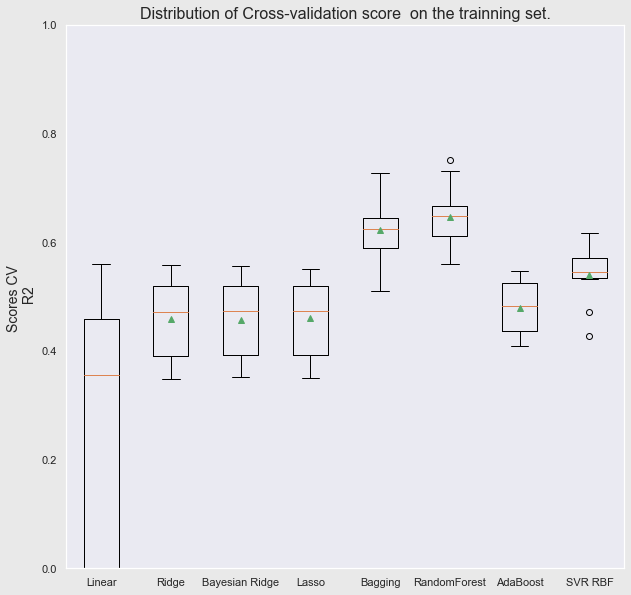

In [193]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(dico_results.values(),labels=dico_results.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

Le modèle de forêt aléatoire semble être le plus efficace.


Модель случайного леса кажется наиболее эффективной. 

Je détermine les fonctionnalités qui impactent le plus la prédiction. (Я определяю функции, которые больше всего влияют на прогноз).

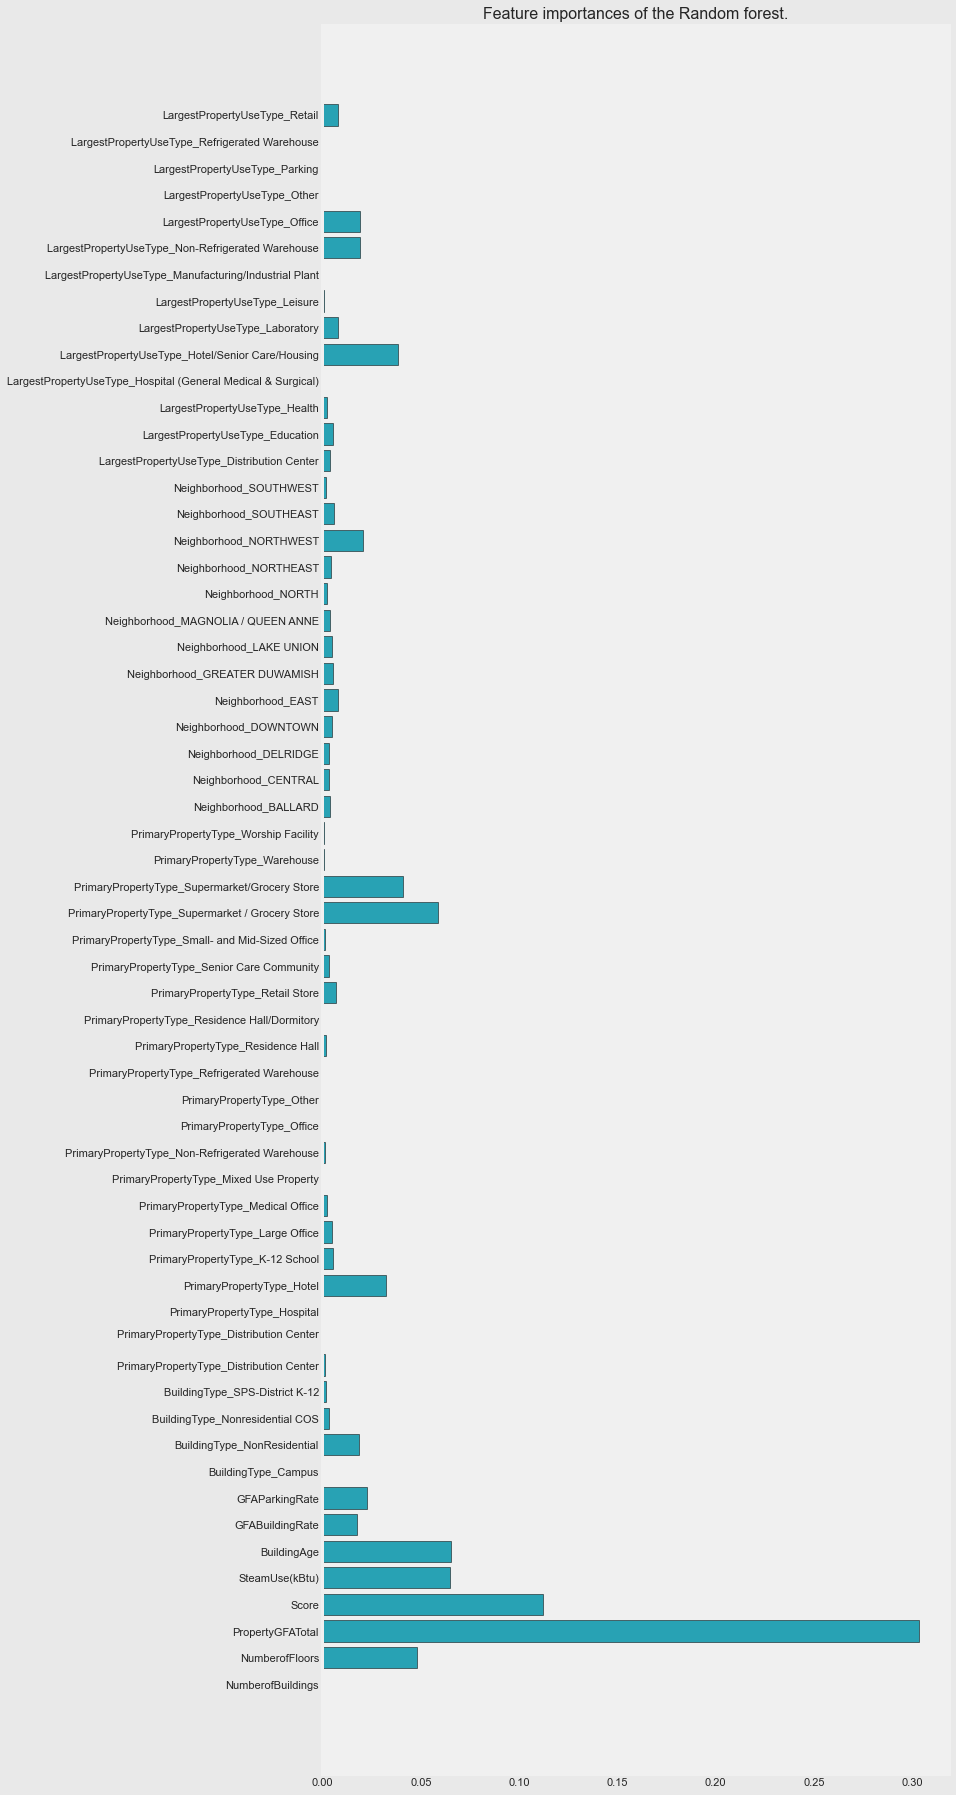

In [340]:
fig=plt.figure(figsize=[10,30])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Feature importances of the Random forest.",size=16)
plt.barh(data.columns, RFregr_best.feature_importances_,color="#28a2b4",edgecolor='black')
plt.grid()


Maintenant, je vais analyser l'erreur de prédiction sur l'ensemble de test.

In [341]:
df_res=pd.DataFrame({"True values": y_test,"Predictions":RFregr_pred_test})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
OSEBuildingID,,,,
21239,40.36,29.3800,27.205154,#7cce2e
24225,16.50,35.8130,117.048485,#cc2900
290,69.42,86.5199,24.632527,#7cce2e
441,243.66,281.2409,15.423500,#7cce2e
25069,95.26,86.9134,8.761915,#13a90d


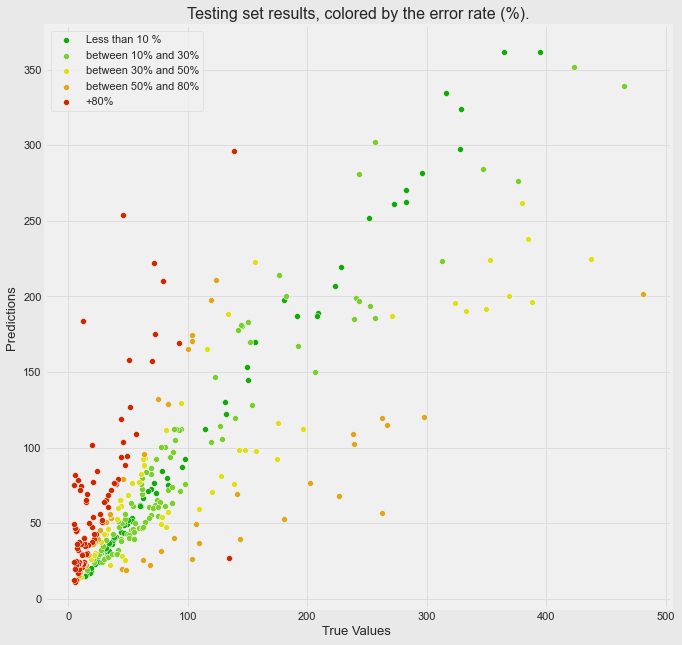

In [342]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

1.4025886896714361


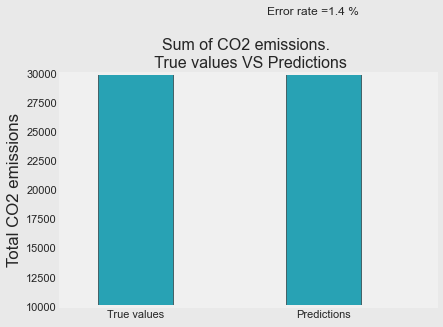

In [343]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,4])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of CO2 emissions. \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,35000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("Total CO2 emissions")
plt.ylim(10000,30000)
plt.xlim(0.6,2.6)
plt.grid()

Si l'on considère les émissions totales de CO2, le taux d'erreur est de +1.4
% ce qui est très faible. À cet égard, le modèle est efficace.

Если мы рассмотрим общее количество выбросов CO2, коэффициент ошибки составит + 1.3%, что очень мало. В этом плане модель эффективна.

In [208]:
df_energy=df_sans_score.drop(['TotalGHGEmissions', 'Electricity(kBtu)'], axis=1)
df_energy.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,,,,,
1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,Hotel/Senior Care/Housing,6981428.0,2023032.0,1272388.0,88,1.00000,0.00000
2,NonResidential,Hotel,DOWNTOWN,1.0,11.0,103566,Hotel/Senior Care/Housing,8354235.0,0.0,4448985.0,19,0.85455,0.14545
8,NonResidential,Hotel,DOWNTOWN,1.0,18.0,119890,Hotel/Senior Care/Housing,14829099.0,0.0,8763105.0,35,0.89607,0.10393
9,Nonresidential COS,Other,DOWNTOWN,1.0,2.0,97288,Police Station,12051984.0,0.0,4781283.0,16,0.61765,0.38235
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,83008,Hotel/Senior Care/Housing,6252842.0,0.0,3573255.0,89,1.00000,0.00000


In [209]:
enc = OneHotEncoder()
scaler = StandardScaler()

In [210]:
df_num2=df_energy.select_dtypes(exclude=['object'])
df_num2=df_num2.drop('SiteEnergyUse(kBtu)', axis=1)
df_num2.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,
1,1.0,12.0,88434,2023032.0,1272388.0,88,1.00000,0.00000
2,1.0,11.0,103566,0.0,4448985.0,19,0.85455,0.14545
8,1.0,18.0,119890,0.0,8763105.0,35,0.89607,0.10393
9,1.0,2.0,97288,0.0,4781283.0,16,0.61765,0.38235
10,1.0,11.0,83008,0.0,3573255.0,89,1.00000,0.00000


In [211]:
scaler.fit(df_num2)
df_num2[df_num2.columns] = pd.DataFrame(scaler.transform(df_num2), index= df_num2.index)
df_num2=pd.concat([df_num2, df_energy['SiteEnergyUse(kBtu)']], axis=1)
df_num2.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,SiteEnergyUse(kBtu)
OSEBuildingID,,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,0.103174,1.017751,0.435931,-0.435931,6981428.0
2,-0.102734,2.631027,0.328993,-0.185390,2.161736,-1.069010,-0.593195,0.593195,8354235.0
8,-0.102734,4.994867,0.530279,-0.185390,4.957459,-0.585123,-0.299422,0.299422,14829099.0
9,-0.102734,-0.408196,0.251581,-0.185390,2.377078,-1.159739,-2.269373,2.269373,12051984.0
10,-0.102734,2.631027,0.075499,-0.185390,1.594228,1.047994,0.435931,-0.435931,6252842.0


In [212]:
print(df_num2.shape)

(2596, 9)


In [213]:
df_num2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 1 to 50226
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NumberofBuildings    2596 non-null   float64
 1   NumberofFloors       2596 non-null   float64
 2   PropertyGFATotal     2596 non-null   float64
 3   SteamUse(kBtu)       2596 non-null   float64
 4   NaturalGas(kBtu)     2596 non-null   float64
 5   BuildingAge          2596 non-null   float64
 6   GFABuildingRate      2596 non-null   float64
 7   GFAParkingRate       2596 non-null   float64
 8   SiteEnergyUse(kBtu)  2596 non-null   float64
dtypes: float64(9)
memory usage: 202.8 KB


In [214]:
df_cat=df_energy.select_dtypes(include=['object'])
df_cat.head()

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
OSEBuildingID,,,,
1,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
2,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
8,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
9,Nonresidential COS,Other,DOWNTOWN,Police Station
10,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing


In [215]:
array = enc.fit_transform(df_cat).toarray()
print(array.shape)

(2596, 68)


In [216]:
colnames=enc.get_feature_names(['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType'])

In [217]:
df_cat = pd.DataFrame(array,index=df_cat.index, columns=colnames)
df_cat.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
df_energy=pd.concat([df_num2,df_cat], axis=1)
df_energy.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,SiteEnergyUse(kBtu),BuildingType_Campus,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,0.103174,1.017751,0.435931,-0.435931,6981428.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.102734,2.631027,0.328993,-0.185390,2.161736,-1.069010,-0.593195,0.593195,8354235.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.102734,4.994867,0.530279,-0.185390,4.957459,-0.585123,-0.299422,0.299422,14829099.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.102734,-0.408196,0.251581,-0.185390,2.377078,-1.159739,-2.269373,2.269373,12051984.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,-0.102734,2.631027,0.075499,-0.185390,1.594228,1.047994,0.435931,-0.435931,6252842.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
df_energy.shape

(2596, 77)

In [220]:
df2=df_energy

In [221]:
df2.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,SiteEnergyUse(kBtu),BuildingType_Campus,...,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.102734,2.968719,0.142405,3.759652,0.103174,1.017751,0.435931,-0.435931,6981428.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.102734,2.631027,0.328993,-0.185390,2.161736,-1.069010,-0.593195,0.593195,8354235.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.102734,4.994867,0.530279,-0.185390,4.957459,-0.585123,-0.299422,0.299422,14829099.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.102734,-0.408196,0.251581,-0.185390,2.377078,-1.159739,-2.269373,2.269373,12051984.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,-0.102734,2.631027,0.075499,-0.185390,1.594228,1.047994,0.435931,-0.435931,6252842.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# Séparer la variable cible 'SiteEnergyUse(kBtu)' dans target et le reste des variables dans data

target = df2['SiteEnergyUse(kBtu)']
data = df2.drop('SiteEnergyUse(kBtu)', axis=1)

In [223]:
print(target.shape)
print(data.shape)

(2596,)
(2596, 76)


In [224]:
# Séparer les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test(X_test, y_test), 
#  avec 20% des données originales pour le test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [225]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2076, 76), (520, 76), (2076,), (520,))

In [226]:
#function returning dictionary of model performances on the dataset received as argument
#We work with the r2 scores obtained after a cross validation, with 10 splits

#функция, возвращающая словарь производительности модели для набора данных, полученного в качестве аргумента
# Мы работаем с оценками r2, полученными после перекрестной проверки, с 10 разделениями
    
def lets_try(train, y):
    results = {}
    
    def test_model(regressor):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(regressor, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    regressor = LinearRegression()
    results["Linear"] = test_model(regressor)
    print("Linear done")
    
    regressor = Ridge()
    results["Ridge"] = test_model(regressor)
    print("Ridge done")

    regressor = BayesianRidge()
    results["Bayesian Ridge"] = test_model(regressor)
    print("Bayesian Ridge done")

    regressor = Lasso(alpha=1e-4)   #  1e+4 = 1 * 10^4 = 1 * 10000 = 10000
    results["Lasso"] = test_model(regressor)
    print("Lasso done.")

    regressor = BaggingRegressor()
    results["Bagging"] = test_model(regressor)
    print("Baggind done")

    regressor = RandomForestRegressor()
    results["RandomForest"] = test_model(regressor)
    print("Random forest done")
    
    regressor = AdaBoostRegressor()
    results["AdaBoost"] = test_model(regressor)
    print("Adaboost done")

    regressor =SVR(kernel='rbf',gamma='auto',C=8)
    results["SVR RBF"] = test_model(regressor)
    print("SVR rbf done")

   
    return results 

In [227]:
dico_results=lets_try(X_train,y_train)

Linear done
Ridge done
Bayesian Ridge done


C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283672883830993.5, tolerance: 2738124794091.32
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829817441534869.5, tolerance: 2718393136271.4546
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566309998801983.5, tolerance: 2647292143508.6343
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

Lasso done.
Baggind done
Random forest done
Adaboost done
SVR rbf done


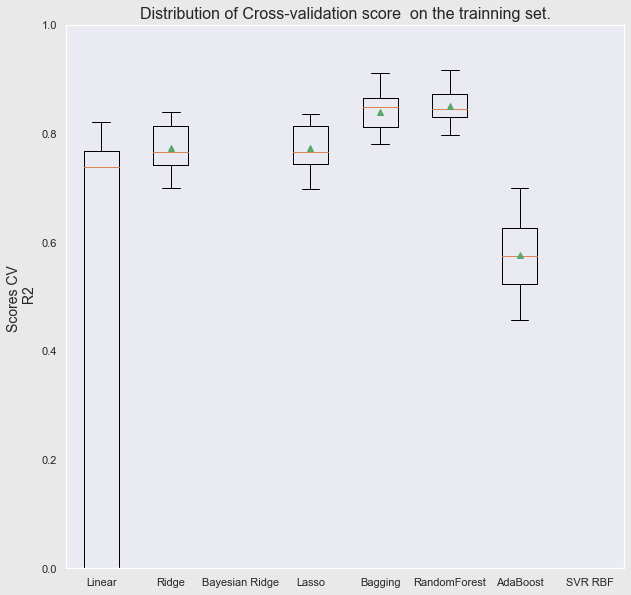

In [228]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(dico_results.values(),labels=dico_results.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

Le modèle de forêt aléatoire semble être le plus efficace.

## Amélioration du modèle, sélection d'hyperparamètres

In [279]:
# RandomForest. Hyperparamètres à régler :
# •'max_features': "sqrt", "log2", None, "auto"
# •'min_samples_split': Nombres pairs allant de 2 à 30.

RFregr = RandomForestRegressor()
parametres_rf = {'max_features':  ["sqrt", "log2", None, "auto"],
              'min_samples_split': [(i) for i in range (2,31,2)]}
grid_RFregr = model_selection.GridSearchCV(estimator=RFregr, param_grid=parametres_rf)
grille = grid_RFregr.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

{'max_features': 'auto', 'min_samples_split': 2}


In [280]:
# Forêt aléatoire : nous allons maintenant essayer d'améliorer le réglage des paramètres Max_depth.
# Nous utiliserons la moyenne des scores de validation croisée de l'ensemble de données d'entraînement avec 6 divisions

# Случайный лес: Теперь попробуем улучшить настройку параметров Max_depth.
# Мы будем использовать среднее значение перекрестной проверки набора обучающих данных с 6 расщеплениями.

def test_model_mean(reg,train,y):
        cv = KFold(n_splits=6, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(reg, train, y, cv=cv, scoring=r2)
        scores = r2_val_score.mean()
        return scores
    
# Maximum depth    
params=[2,3,5,10,15,20,25,30,40,50,60]
score_train=[]
for p in params:
    model=RandomForestRegressor() 
    model.set_params(max_depth=p)
    score=test_model_mean(model,X_train,y_train)
    score_train.append(score)
    

Text(0, 0.5, 'Mean of the CV score')

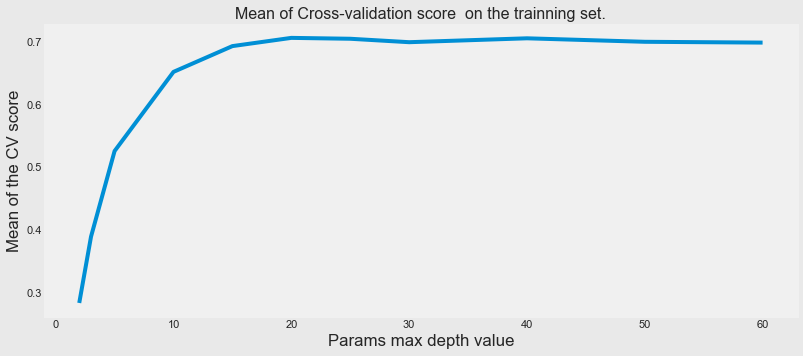

In [281]:
#Visualisation
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Mean of Cross-validation score  on the trainning set.",size=16)
plt.plot(params,score_train)
plt.grid()
plt.xlabel("Params max depth value")
plt.ylabel("Mean of the CV score")

Le score est maximum et stable à partir de max_depth=15.

Оценка максимальна и стабильна от max_depth=15.

In [282]:
RFregr_best = RandomForestRegressor(max_depth=15, min_samples_split = 2, max_features=None)
RFregr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None)

In [283]:
RFregr_pred_train = RFregr_best.predict(X_train)
RFregr_pred_test = RFregr_best.predict(X_test)

print("mse du RandomForestRegressor train:", mean_squared_error(RFregr_pred_train, y_train))
print("mse du RandomForestRegressor test:", mean_squared_error(RFregr_pred_test, y_test))

# Calcul de l'accuracy
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement:", RFregr_best.score(X_train, y_train))
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble de test:", RFregr_best.score(X_test, y_test))

# train всегда лучше, чем test

mse du RandomForestRegressor train: 465.70834439856986
mse du RandomForestRegressor test: 3097.0952554397613
le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement: 0.9416188669574401
le score (R²) du modèle RandomForestRegressor sur l'ensemble de test: 0.6667225414740732


Je détermine les fonctionnalités qui impactent le plus la prédiction.

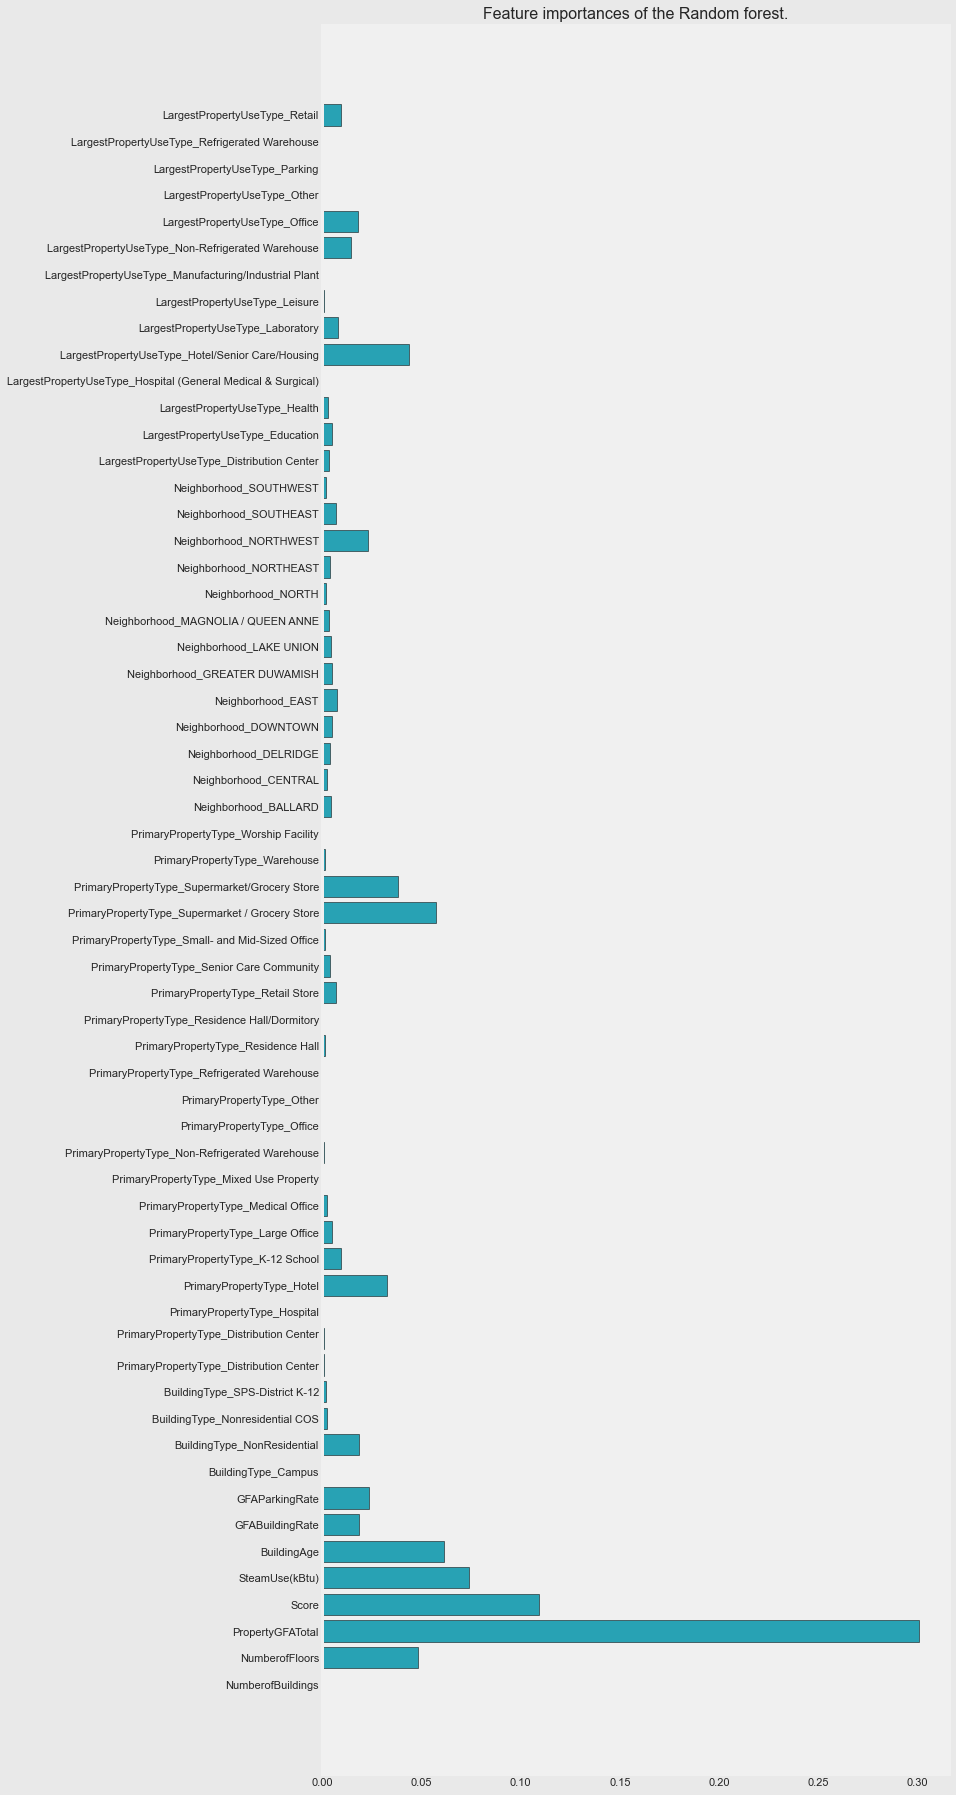

In [284]:
fig=plt.figure(figsize=[10,30])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Feature importances of the Random forest.",size=16)
plt.barh(data.columns, RFregr_best
         .feature_importances_,color="#28a2b4",edgecolor='black')
plt.grid()

Maintenant, je vais analyser l'erreur de prédiction sur l'ensemble de test

In [285]:
df_res=pd.DataFrame({"True values": y_test,"Predictions":RFregr_pred_test})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
OSEBuildingID,,,,
21239,40.36,28.858042,28.498410,#7cce2e
24225,16.50,48.133841,191.720248,#cc2900
290,69.42,102.078115,47.044245,#dddf1f
441,243.66,294.747300,20.966634,#7cce2e
25069,95.26,90.754583,4.729600,#13a90d


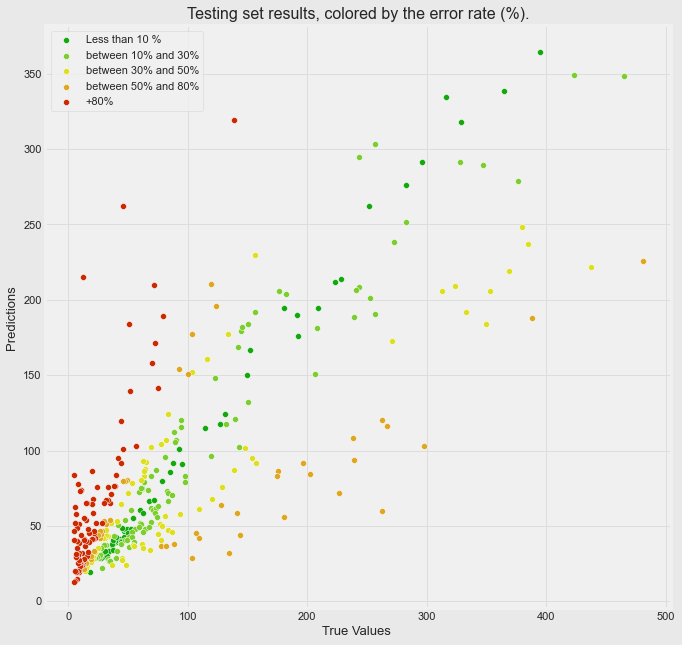

In [286]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')


1.864859510467395


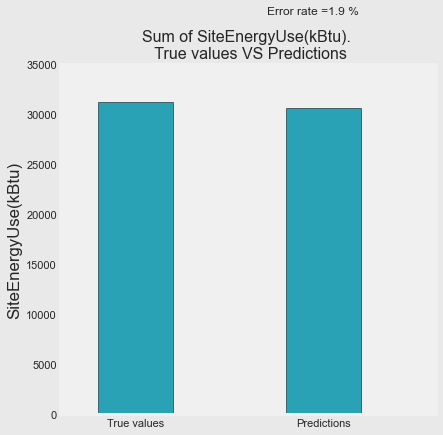

In [296]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of SiteEnergyUse(kBtu). \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,40000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("SiteEnergyUse(kBtu)")
plt.ylim(0, 35000)
plt.xlim(0.6,2.6)
plt.grid()

Si l'on considère la quantité totale SiteEnergyUse(kBtu), le taux d'erreur est de + 1,9 % ce qui est très faible. Dans ce contexte, le modèle est efficace

Le projet doit également évaluer la valeur du "Score ENERGY STAR" pour prédire les émissions, ce qui est fastidieux à calculer avec l'approche actuellement utilisée par l'équipe.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3267 non-null   int64  
 1   BuildingType               3267 non-null   object 
 2   PrimaryPropertyType        3267 non-null   object 
 3   Neighborhood               3267 non-null   object 
 4   NumberofBuildings          3267 non-null   float64
 5   NumberofFloors             3267 non-null   float64
 6   PropertyGFATotal           3267 non-null   int64  
 7   PropertyGFAParking         3267 non-null   int64  
 8   PropertyGFABuilding(s)     3267 non-null   int64  
 9   LargestPropertyUseType     3197 non-null   object 
 10  LargestPropertyUseTypeGFA  3197 non-null   float64
 11  ENERGYSTARScore            2188 non-null   float64
 12  SiteEnergyUse(kBtu)        3259 non-null   float64
 13  SteamUse(kBtu)             3259 non-null   float

In [114]:
df_avec_score=df.dropna(axis=0, how='any')

In [115]:
df_avec_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 3371
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              2137 non-null   int64  
 1   BuildingType               2137 non-null   object 
 2   PrimaryPropertyType        2137 non-null   object 
 3   Neighborhood               2137 non-null   object 
 4   NumberofBuildings          2137 non-null   float64
 5   NumberofFloors             2137 non-null   float64
 6   PropertyGFATotal           2137 non-null   int64  
 7   PropertyGFAParking         2137 non-null   int64  
 8   PropertyGFABuilding(s)     2137 non-null   int64  
 9   LargestPropertyUseType     2137 non-null   object 
 10  LargestPropertyUseTypeGFA  2137 non-null   float64
 11  ENERGYSTARScore            2137 non-null   float64
 12  SiteEnergyUse(kBtu)        2137 non-null   float64
 13  SteamUse(kBtu)             2137 non-null   float

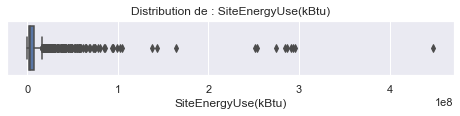

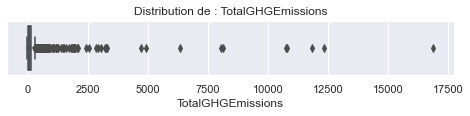

In [116]:
# •Représenter visuellement et comparer la distribution des variables target, à l'aide par exemple d'un boxplot.

var_num = df_avec_score[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

for column in var_num:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df_avec_score[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [117]:
borne=round(np.percentile(df_avec_score["TotalGHGEmissions"].values, 95),2)
df_avec_score=df_avec_score.loc[df_avec_score["TotalGHGEmissions"]<borne]
borne2=round(np.percentile(df_avec_score["TotalGHGEmissions"].values, 5),2)
df_avec_score=df_avec_score.loc[df_avec_score["TotalGHGEmissions"]>borne2]

In [118]:
borne=round(np.percentile(df_avec_score["SiteEnergyUse(kBtu)"].values, 95),2)
df_avec_score=df_avec_score.loc[df_avec_score["SiteEnergyUse(kBtu)"]<borne]
borne2=round(np.percentile(df_avec_score["SiteEnergyUse(kBtu)"].values, 5),2)
df_avec_score=df_avec_score.loc[df_avec_score["SiteEnergyUse(kBtu)"]>borne2]

In [119]:
# On calcule les ratios

df_avec_score['GFABuildingRate'] = (round((df_avec_score['PropertyGFABuilding(s)'] /df_avec_score['PropertyGFATotal']),5))

df_avec_score['GFAParkingRate'] = (round((df_avec_score['PropertyGFAParking'] /df_avec_score['PropertyGFATotal']),5))
                                                               

In [120]:
#On supprime les variables inutiles
df_avec_score = df_avec_score.drop(['LargestPropertyUseTypeGFA', 
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1)

In [121]:
df_avec_score=df_avec_score.set_index('OSEBuildingID')

In [122]:
# Rename the score 
df_avec_score = df_avec_score.rename(columns = {'ENERGYSTARScore': 'Score'})

In [123]:
df_avec_score.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Score,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,Hotel/Senior Care/Housing,65.0,6981428.0,2023032.0,3686160.0,1272388.0,249.43,88,1.00000,0.00000
2,NonResidential,Hotel,DOWNTOWN,1.0,11.0,103566,Hotel/Senior Care/Housing,51.0,8354235.0,0.0,3905411.0,4448985.0,263.51,19,0.85455,0.14545
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,83008,Hotel/Senior Care/Housing,25.0,6252842.0,0.0,2679698.0,3573255.0,208.46,89,1.00000,0.00000
12,NonResidential,Hotel,DOWNTOWN,1.0,15.0,163984,Hotel/Senior Care/Housing,46.0,12633744.0,0.0,7355649.0,5278400.0,331.61,111,1.00000,0.00000
17,NonResidential,Hotel,DOWNTOWN,1.0,9.0,65009,Hotel/Senior Care/Housing,39.0,6807227.0,1987163.0,1615057.0,3205074.0,334.87,87,1.00000,0.00000


In [124]:
df_avec_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 1 to 50222
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            1739 non-null   object 
 1   PrimaryPropertyType     1739 non-null   object 
 2   Neighborhood            1739 non-null   object 
 3   NumberofBuildings       1739 non-null   float64
 4   NumberofFloors          1739 non-null   float64
 5   PropertyGFATotal        1739 non-null   int64  
 6   LargestPropertyUseType  1739 non-null   object 
 7   Score                   1739 non-null   float64
 8   SiteEnergyUse(kBtu)     1739 non-null   float64
 9   SteamUse(kBtu)          1739 non-null   float64
 10  Electricity(kBtu)       1739 non-null   float64
 11  NaturalGas(kBtu)        1739 non-null   float64
 12  TotalGHGEmissions       1739 non-null   float64
 13  BuildingAge             1739 non-null   int64  
 14  GFABuildingRate         1739 non-null  

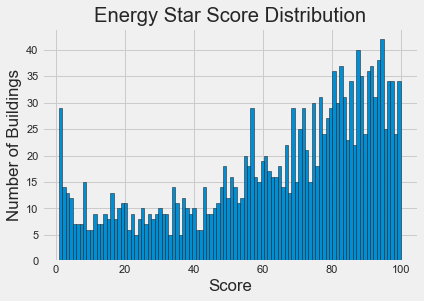

In [356]:
# Distribution de la variable "EnergyStarScore" (Histogram)

plt.style.use('fivethirtyeight')
plt.hist(df_avec_score['Score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Ce que signifie votre note ENERGY STAR de 1 à 100?


Le score ENERGY STAR fournit un aperçu complet de la performance énergétique de votre bâtiment, en tenant compte des actifs physiques, des opérations et du comportement des occupants du bâtiment.

Il est exprimé sur une échelle de 1 à 100 facile à comprendre, où plus le score est élevé, meilleure est la performance énergétique du bâtiment.

Le score Energy Star est un centile, ce qui signifie qu'une distribution uniforme doit être attendue lorsque chaque score est attribué au même nombre de bâtiments. Cependant, les scores les plus élevés et les plus bas ont reçu des non-conformités avec un grand nombre de bâtiments (pour un score Energy Star, plus il y en a, mieux c'est).

Si nous revoyons la définition de ce score, nous verrons qu'il est calculé sur la base des "relevés auto-achetés" par les propriétaires d'immeubles, ce qui peut expliquer l'excès de valeurs très importantes. Ce n'est donc peut-être pas le critère le plus objectif pour évaluer l'efficacité énergétique d'un bien immobilier.

In [357]:
df_emission_score=df_avec_score.drop(['SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)

In [358]:
enc = OneHotEncoder()
scaler = StandardScaler()

In [359]:
df_num1=df_emission_score.select_dtypes(exclude=['object'])
df_num1=df_num1.drop('TotalGHGEmissions', axis=1)
df_num1.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,
1,1.0,12.0,88434,65.0,2023032.0,88,1.00000,0.00000
2,1.0,11.0,103566,51.0,0.0,19,0.85455,0.14545
10,1.0,11.0,83008,25.0,0.0,89,1.00000,0.00000
12,1.0,15.0,163984,46.0,0.0,111,1.00000,0.00000
17,1.0,9.0,65009,39.0,1987163.0,87,1.00000,0.00000


In [360]:
scaler.fit(df_num1)


df_num1[df_num1.columns] = pd.DataFrame(scaler.transform(df_num1), index= df_num1.index)

df_num1=pd.concat([df_num1, df_emission_score.TotalGHGEmissions], axis=1)
df_num1.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,TotalGHGEmissions
OSEBuildingID,,,,,,,,,
1,-0.058336,2.650005,0.045604,0.038324,4.630663,1.098384,0.472880,-0.472880,249.43
2,-0.058336,2.339448,0.223589,-0.457177,-0.192884,-1.026744,-0.570562,0.570562,263.51
10,-0.058336,2.339448,-0.018217,-1.377392,-0.192884,1.129183,0.472880,-0.472880,208.46
12,-0.058336,3.581677,0.934232,-0.634141,-0.192884,1.806760,0.472880,-0.472880,331.61
17,-0.058336,1.718334,-0.229923,-0.881891,4.545140,1.067585,0.472880,-0.472880,334.87


In [361]:
df_cat=df_emission_score.select_dtypes(include=['object'])
df_cat.head()


,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
OSEBuildingID,,,,
1,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
2,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
10,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
12,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
17,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing


In [362]:
array = enc.fit_transform(df_cat).toarray()
print(array.shape)

(1739, 52)


In [363]:
colnames=enc.get_feature_names(['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType'])
colnames

array(['BuildingType_Campus', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS',
       'BuildingType_SPS-District K-12',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Distribution Center\n',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Non-Refrigerated Warehouse',
       'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall',
       'PrimaryPropertyType_Residence Hall/Dormitory',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPrope

In [364]:
df_cat = pd.DataFrame(array,index=df_cat.index, columns=colnames)
df_cat.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,...,LargestPropertyUseType_Hotel/Senior Care/Housing,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Leisure,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [365]:
df_emission_score=pd.concat([df_num1,df_cat], axis=1)
df_emission_score.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,TotalGHGEmissions,BuildingType_Campus,...,LargestPropertyUseType_Hotel/Senior Care/Housing,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Leisure,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.058336,2.650005,0.045604,0.038324,4.630663,1.098384,0.472880,-0.472880,249.43,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.058336,2.339448,0.223589,-0.457177,-0.192884,-1.026744,-0.570562,0.570562,263.51,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,-0.058336,2.339448,-0.018217,-1.377392,-0.192884,1.129183,0.472880,-0.472880,208.46,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.058336,3.581677,0.934232,-0.634141,-0.192884,1.806760,0.472880,-0.472880,331.61,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-0.058336,1.718334,-0.229923,-0.881891,4.545140,1.067585,0.472880,-0.472880,334.87,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
df2=df_emission_score

In [367]:
# Séparer la variable cible 'TotalGHGEmissions' dans target et le reste des variables dans data
target = df2['TotalGHGEmissions']
data = df2.drop('TotalGHGEmissions', axis=1)

In [368]:
# Séparer les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test(X_test, y_test), 
#  avec 20% des données originales pour le test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [369]:
def lets_try(train, y):
    results = {}
    
    def test_model(regressor):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(regressor, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    regressor = LinearRegression()
    results["Linear"] = test_model(regressor)
    print("Linear done")
    
    regressor = Ridge()
    results["Ridge"] = test_model(regressor)
    print("Ridge done")

    regressor = BayesianRidge()
    results["Bayesian Ridge"] = test_model(regressor)
    print("Bayesian Ridge done")

    regressor = Lasso(alpha=1e-4)   #  1e+4 = 1 * 10^4 = 1 * 10000 = 10000
    results["Lasso"] = test_model(regressor)
    print("Lasso done.")

    regressor = BaggingRegressor()
    results["Bagging"] = test_model(regressor)
    print("Baggind done")

    regressor = RandomForestRegressor()
    results["RandomForest"] = test_model(regressor)
    print("Random forest done")
    
    regressor = AdaBoostRegressor()
    results["AdaBoost"] = test_model(regressor)
    print("Adaboost done")

    regressor =SVR(kernel='rbf',gamma='auto',C=8)
    results["SVR RBF"] = test_model(regressor)
    print("SVR rbf done")

   
    return results 

In [370]:
dico_results=lets_try(X_train,y_train)

Linear done
Ridge done
Bayesian Ridge done


C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60384.90792271076, tolerance: 1013.2335049195846
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669233.4705312368, tolerance: 1007.207146713698
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477481.8549065427, tolerance: 1009.3534289852637
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Lasso done.
Baggind done
Random forest done
Adaboost done
SVR rbf done


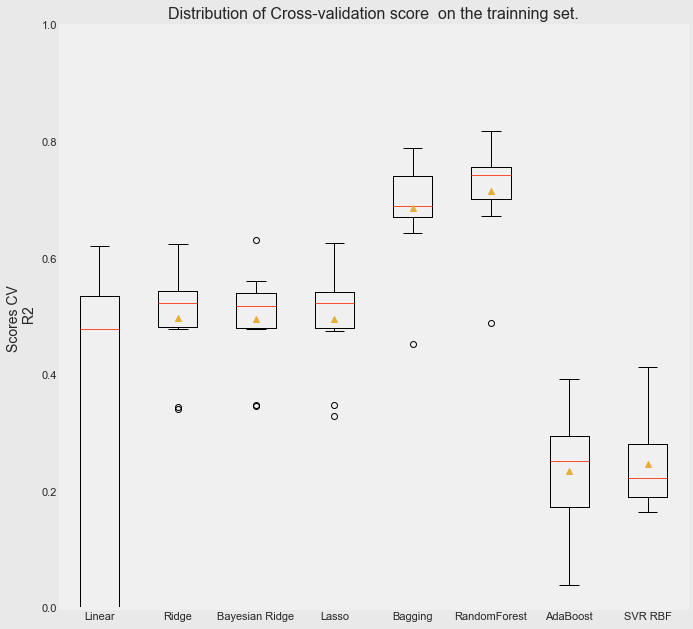

In [371]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(dico_results.values(),labels=dico_results.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

In [372]:
# RandomForest. Hyperparamètres à régler :
# •'max_features': "sqrt", "log2", None, "auto"
# •'min_samples_split': Nombres pairs allant de 2 à 30.

RFregr = RandomForestRegressor()
parametres_rf = {'max_features':  ["sqrt", "log2", None, "auto"],
              'min_samples_split': [(i) for i in range (2,31,2)]}
grid_RFregr = model_selection.GridSearchCV(estimator=RFregr, param_grid=parametres_rf)
grille = grid_RFregr.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

{'max_features': 'auto', 'min_samples_split': 2}


In [373]:
# Forêt aléatoire : nous allons maintenant essayer d'améliorer le réglage des paramètres Max_depth.
# Nous utiliserons la moyenne des scores de validation croisée de l'ensemble de données d'entraînement avec 6 divisions

# Случайный лес: Теперь попробуем улучшить настройку параметров Max_depth.
# Мы будем использовать среднее значение перекрестной проверки набора обучающих данных с 6 расщеплениями.

def test_model_mean(reg,train,y):
        cv = KFold(n_splits=6, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(reg, train, y, cv=cv, scoring=r2)
        scores = r2_val_score.mean()
        return scores
    
# Maximum depth    
params=[2,3,5,10,15,20,25,30,40,50,60]
score_train=[]
for p in params:
    model=RandomForestRegressor() 
    model.set_params(max_depth=p)
    score=test_model_mean(model,X_train,y_train)
    score_train.append(score)


Text(0, 0.5, 'Mean of the CV score')

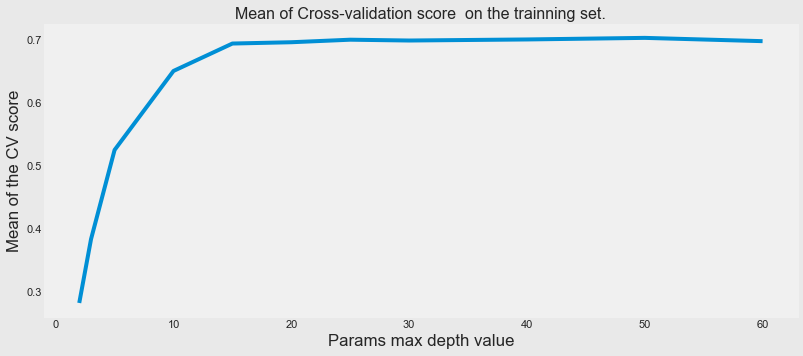

In [374]:
#Visualisation
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Mean of Cross-validation score  on the trainning set.",size=16)
plt.plot(params,score_train)
plt.grid()
plt.xlabel("Params max depth value")
plt.ylabel("Mean of the CV score")

Le score est maximum et stable à partir de max_depth=15.

Оценка максимальна и стабильна от max_depth=15.

In [375]:
RFregr_best = RandomForestRegressor(max_depth=15, min_samples_split = 2, max_features='auto')
RFregr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15)

In [376]:
RFregr_pred_train = RFregr_best.predict(X_train)
RFregr_pred_test = RFregr_best.predict(X_test)

print("mse du RandomForestRegressor train:", mean_squared_error(RFregr_pred_train, y_train))
print("mse du RandomForestRegressor test:", mean_squared_error(RFregr_pred_test, y_test))

# Calcul de l'accuracy
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement:", RFregr_best.score(X_train, y_train))
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble de test:", RFregr_best.score(X_test, y_test))

# train всегда лучше, чем test

mse du RandomForestRegressor train: 470.6920984189883
mse du RandomForestRegressor test: 3167.9990121688315
le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement: 0.940994104249155
le score (R²) du modèle RandomForestRegressor sur l'ensemble de test: 0.6590926102341154


In [377]:
df_res=pd.DataFrame({"True values": y_test,"Predictions":RFregr_pred_test})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
OSEBuildingID,,,,
21239,40.36,28.737301,28.797569,#7cce2e
24225,16.50,51.190403,210.244868,#cc2900
290,69.42,88.062665,26.854891,#7cce2e
441,243.66,278.685500,14.374743,#7cce2e
25069,95.26,82.751064,13.131363,#7cce2e


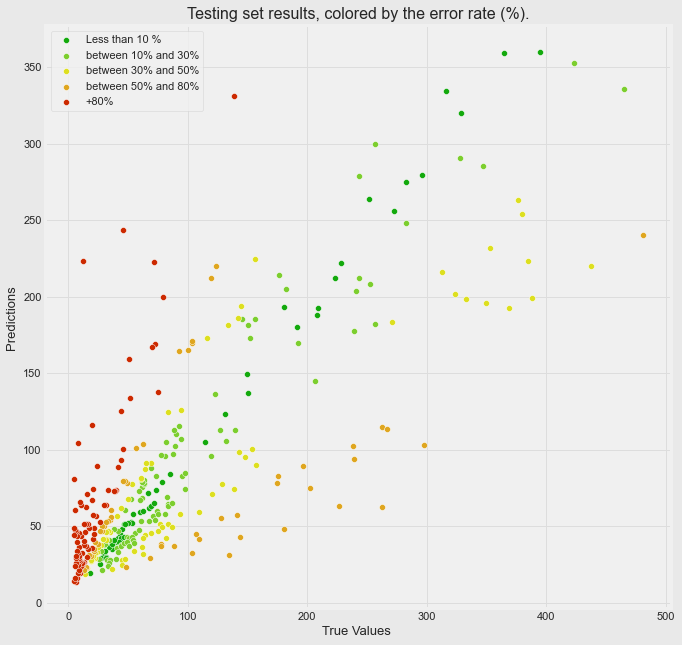

In [378]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

2.0204652588201317


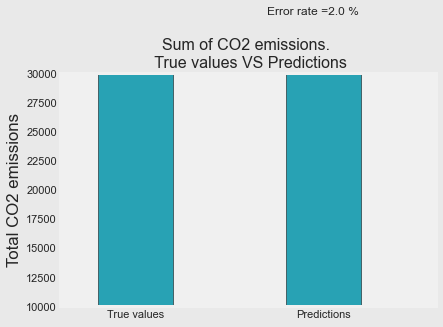

In [379]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,4])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of CO2 emissions. \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,35000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("Total CO2 emissions")
plt.ylim(10000,30000)
plt.xlim(0.6,2.6)
plt.grid()

In [125]:
df_energy=df_avec_score.drop(['TotalGHGEmissions', 'Electricity(kBtu)'], axis=1)
df_energy.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Score,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,,,,,,
1,NonResidential,Hotel,DOWNTOWN,1.0,12.0,88434,Hotel/Senior Care/Housing,65.0,6981428.0,2023032.0,1272388.0,88,1.00000,0.00000
2,NonResidential,Hotel,DOWNTOWN,1.0,11.0,103566,Hotel/Senior Care/Housing,51.0,8354235.0,0.0,4448985.0,19,0.85455,0.14545
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,83008,Hotel/Senior Care/Housing,25.0,6252842.0,0.0,3573255.0,89,1.00000,0.00000
12,NonResidential,Hotel,DOWNTOWN,1.0,15.0,163984,Hotel/Senior Care/Housing,46.0,12633744.0,0.0,5278400.0,111,1.00000,0.00000
17,NonResidential,Hotel,DOWNTOWN,1.0,9.0,65009,Hotel/Senior Care/Housing,39.0,6807227.0,1987163.0,3205074.0,87,1.00000,0.00000


In [128]:
enc = OneHotEncoder()
scaler = StandardScaler()

In [129]:
df_num2=df_energy.select_dtypes(exclude=['object'])
df_num2=df_num2.drop('SiteEnergyUse(kBtu)', axis=1)
df_num2.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate
OSEBuildingID,,,,,,,,,
1,1.0,12.0,88434,65.0,2023032.0,1272388.0,88,1.00000,0.00000
2,1.0,11.0,103566,51.0,0.0,4448985.0,19,0.85455,0.14545
10,1.0,11.0,83008,25.0,0.0,3573255.0,89,1.00000,0.00000
12,1.0,15.0,163984,46.0,0.0,5278400.0,111,1.00000,0.00000
17,1.0,9.0,65009,39.0,1987163.0,3205074.0,87,1.00000,0.00000


In [130]:
scaler.fit(df_num2)
df_num2[df_num2.columns] = pd.DataFrame(scaler.transform(df_num2), index= df_num2.index)
df_num2=pd.concat([df_num2, df_energy['SiteEnergyUse(kBtu)']], axis=1)
df_num2.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,SiteEnergyUse(kBtu)
OSEBuildingID,,,,,,,,,,
1,-0.058336,2.650005,0.045604,0.038324,4.630663,0.132097,1.098384,0.472880,-0.472880,6981428.0
2,-0.058336,2.339448,0.223589,-0.457177,-0.192884,2.259724,-1.026744,-0.570562,0.570562,8354235.0
10,-0.058336,2.339448,-0.018217,-1.377392,-0.192884,1.673176,1.129183,0.472880,-0.472880,6252842.0
12,-0.058336,3.581677,0.934232,-0.634141,-0.192884,2.815252,1.806760,0.472880,-0.472880,12633744.0
17,-0.058336,1.718334,-0.229923,-0.881891,4.545140,1.426575,1.067585,0.472880,-0.472880,6807227.0


In [131]:
df_cat=df_energy.select_dtypes(include=['object'])
df_cat.head()

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
OSEBuildingID,,,,
1,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
2,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
10,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
12,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing
17,NonResidential,Hotel,DOWNTOWN,Hotel/Senior Care/Housing


In [133]:
array = enc.fit_transform(df_cat).toarray()
print(array.shape)

(1739, 52)


In [134]:
colnames=enc.get_feature_names(['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType'])

In [135]:
df_cat = pd.DataFrame(array,index=df_cat.index, columns=colnames)
df_cat.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,...,LargestPropertyUseType_Hotel/Senior Care/Housing,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Leisure,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
df_energy=pd.concat([df_num2,df_cat], axis=1)
df_energy.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,Score,SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,GFABuildingRate,GFAParkingRate,SiteEnergyUse(kBtu),...,LargestPropertyUseType_Hotel/Senior Care/Housing,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Leisure,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Retail
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,-0.058336,2.650005,0.045604,0.038324,4.630663,0.132097,1.098384,0.472880,-0.472880,6981428.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.058336,2.339448,0.223589,-0.457177,-0.192884,2.259724,-1.026744,-0.570562,0.570562,8354235.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,-0.058336,2.339448,-0.018217,-1.377392,-0.192884,1.673176,1.129183,0.472880,-0.472880,6252842.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.058336,3.581677,0.934232,-0.634141,-0.192884,2.815252,1.806760,0.472880,-0.472880,12633744.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-0.058336,1.718334,-0.229923,-0.881891,4.545140,1.426575,1.067585,0.472880,-0.472880,6807227.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
df2=df_energy

In [138]:
# Séparer la variable cible 'SiteEnergyUse(kBtu)' dans target et le reste des variables dans data

target = df2['SiteEnergyUse(kBtu)']
data = df2.drop('SiteEnergyUse(kBtu)', axis=1)

In [139]:
# Séparer les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test(X_test, y_test), 
#  avec 20% des données originales pour le test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [140]:
#function returning dictionary of model performances on the dataset received as argument
#We work with the r2 scores obtained after a cross validation, with 10 splits

#функция, возвращающая словарь производительности модели для набора данных, полученного в качестве аргумента
# Мы работаем с оценками r2, полученными после перекрестной проверки, с 10 разделениями
    
def lets_try(train, y):
    results = {}
    
    def test_model(regressor):
        cv = KFold(n_splits=10, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(regressor, train, y, cv=cv, scoring=r2)
        scores = r2_val_score
        return scores
    
    regressor = LinearRegression()
    results["Linear"] = test_model(regressor)
    print("Linear done")
    
    regressor = Ridge()
    results["Ridge"] = test_model(regressor)
    print("Ridge done")

    regressor = BayesianRidge()
    results["Bayesian Ridge"] = test_model(regressor)
    print("Bayesian Ridge done")

    regressor = Lasso(alpha=1e-4)   #  1e+4 = 1 * 10^4 = 1 * 10000 = 10000
    results["Lasso"] = test_model(regressor)
    print("Lasso done.")

    regressor = BaggingRegressor()
    results["Bagging"] = test_model(regressor)
    print("Baggind done")

    regressor = RandomForestRegressor()
    results["RandomForest"] = test_model(regressor)
    print("Random forest done")
    
    regressor = AdaBoostRegressor()
    results["AdaBoost"] = test_model(regressor)
    print("Adaboost done")

    regressor =SVR(kernel='rbf',gamma='auto',C=8)
    results["SVR RBF"] = test_model(regressor)
    print("SVR rbf done")

   
    return results 

In [141]:
dico_results=lets_try(X_train,y_train)

Linear done
Ridge done
Bayesian Ridge done


C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483103468585052.4, tolerance: 1762149921507.7336
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467577825192652.25, tolerance: 1824698350715.7944
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587615080847179.2, tolerance: 1823846599020.0977
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

Lasso done.
Baggind done
Random forest done
Adaboost done
SVR rbf done


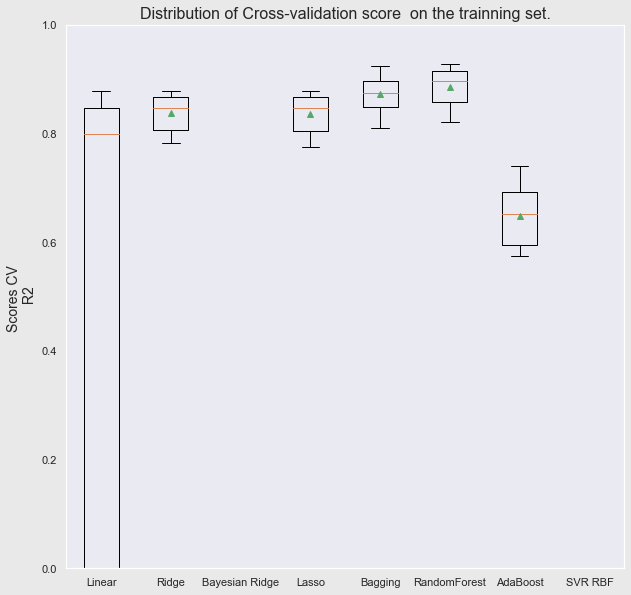

In [142]:
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of Cross-validation score  on the trainning set.",size=16)
plt.boxplot(dico_results.values(),labels=dico_results.keys(),showmeans=True)
plt.ylabel("Scores CV \n R2",size=14)
plt.ylim(0,1)
plt.grid()

In [143]:
# RandomForest. Hyperparamètres à régler :
# •'max_features': "sqrt", "log2", None, "auto"
# •'min_samples_split': Nombres pairs allant de 2 à 30.

RFregr = RandomForestRegressor()
parametres_rf = {'max_features':  ["sqrt", "log2", None, "auto"],
              'min_samples_split': [(i) for i in range (2,31,2)]}
grid_RFregr = model_selection.GridSearchCV(estimator=RFregr, param_grid=parametres_rf)
grille = grid_RFregr.fit(X_train,y_train)
pd.DataFrame(grille.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille.best_params_)

{'max_features': 'auto', 'min_samples_split': 2}


In [144]:
# Forêt aléatoire : nous allons maintenant essayer d'améliorer le réglage des paramètres Max_depth.
# Nous utiliserons la moyenne des scores de validation croisée de l'ensemble de données d'entraînement avec 6 divisions

# Случайный лес: Теперь попробуем улучшить настройку параметров Max_depth.
# Мы будем использовать среднее значение перекрестной проверки набора обучающих данных с 6 расщеплениями.

def test_model_mean(reg,train,y):
        cv = KFold(n_splits=6, shuffle=True, random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(reg, train, y, cv=cv, scoring=r2)
        scores = r2_val_score.mean()
        return scores
    
# Maximum depth    
params=[2,3,5,10,15,20,25,30,40,50,60]
score_train=[]
for p in params:
    model=RandomForestRegressor() 
    model.set_params(max_depth=p)
    score=test_model_mean(model,X_train,y_train)
    score_train.append(score)

Text(0, 0.5, 'Mean of the CV score')

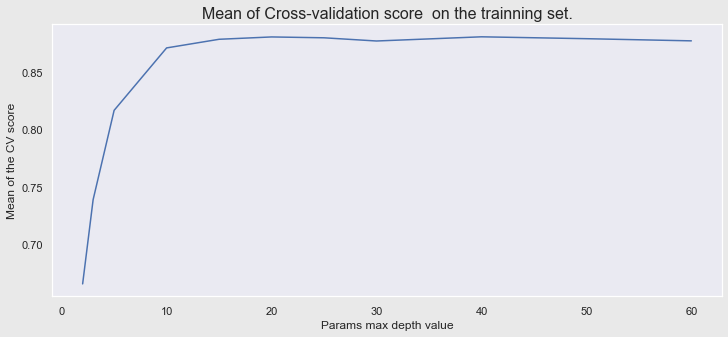

In [145]:
#Visualisation
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Mean of Cross-validation score  on the trainning set.",size=16)
plt.plot(params,score_train)
plt.grid()
plt.xlabel("Params max depth value")
plt.ylabel("Mean of the CV score")

In [146]:
RFregr_best = RandomForestRegressor(max_depth=15, min_samples_split = 2, max_features='auto')
RFregr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15)

In [147]:
RFregr_pred_train = RFregr_best.predict(X_train)
RFregr_pred_test = RFregr_best.predict(X_test)

print("mse du RandomForestRegressor train:", mean_squared_error(RFregr_pred_train, y_train))
print("mse du RandomForestRegressor test:", mean_squared_error(RFregr_pred_test, y_test))

# Calcul de l'accuracy
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement:", RFregr_best.score(X_train, y_train))
print("le score (R²) du modèle RandomForestRegressor sur l'ensemble de test:", RFregr_best.score(X_test, y_test))

# train всегда лучше, чем test

mse du RandomForestRegressor train: 212287697806.58914
mse du RandomForestRegressor test: 1294454874556.4841
le score (R²) du modèle RandomForestRegressor sur l'ensemble d'entraînement: 0.9852810122331662
le score (R²) du modèle RandomForestRegressor sur l'ensemble de test: 0.9207427626369684


In [148]:
df_res=pd.DataFrame({"True values": y_test,"Predictions":RFregr_pred_test})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
OSEBuildingID,,,,
21239,1022112.000,1.097557e+06,7.381284,#13a90d
24225,1108310.875,1.537390e+06,38.714662,#dddf1f
290,3822102.500,4.086888e+06,6.927745,#13a90d
441,9474745.000,9.272827e+06,2.131122,#13a90d
25069,2454812.000,2.124159e+06,13.469580,#7cce2e


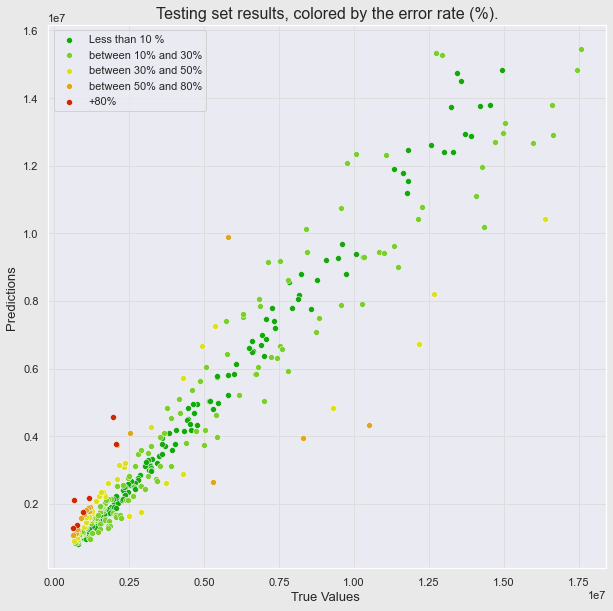

In [149]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')


2.098881966639873


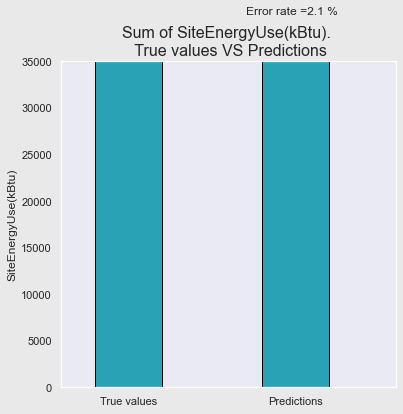

In [150]:
t,p=df_res["True values"].sum(),df_res["Predictions"].sum()
error=abs(t-p)/t*100
print(error)

fig=plt.figure(figsize=[6,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Sum of SiteEnergyUse(kBtu). \n True values VS Predictions",size=16)
plt.bar(x=[1,2],height=[df_res["True values"].sum(),df_res["Predictions"].sum()],color="#28a2b4",width=0.4, edgecolor="black")
plt.xticks([1,2],["True values","Predictions"])
plt.text(1.7,40000,"Error rate ={} %".format(round(error,1)),size=12)
plt.ylabel("SiteEnergyUse(kBtu)")
plt.ylim(0, 35000)
plt.xlim(0.6,2.6)
plt.grid()